In [1]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
from xhistogram.xarray import histogram as xh
%reload_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [2]:
rootdir = '/local/rodgers/MI_JUL13_2020_RCP85'
filename = 'sfc_MI_tropical_ens1*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
trop_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
trop_avg = trop_all.mean(dim='ensemble')

In [3]:
wn.filterwarnings('ignore')
cod = pd.read_csv('species/atlantic_cod.csv', header=0)
bass = pd.read_csv('species/stripped_bass.csv', header=0)
flounder = pd.read_csv('species/summer_flounder.csv', header=0)
seabream = pd.read_csv('species/seabream.csv', header=0)
red_drum = pd.read_csv('species/red_drum.csv', header=0)
n_lampfish = pd.read_csv('species/northern_lampfish.csv', header=0)
blue_lampfish = pd.read_csv('species/blue_lampfish.csv', header=0)
cunner = pd.read_csv('species/cunner.csv', header=0)
eelpout = pd.read_csv('species/eelpout.csv', header=0)

In [3]:
rootdir = '/local/rodgers/MI_JUL13_2020_RCP85'
filename = 'MI_cod_k01_ens1*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
cod_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
cod_avg = cod_all.mean(dim='ensemble')
codAvg = xr.open_dataset('/home/aos/ystochel/esm2m/data/processed/MI_cod_k01_ens131_1x1_1950_2100.nc')

In [4]:
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':trop_avg['xt_ocean'],'yt_ocean':trop_avg['yt_ocean']})
oceanmask = np.isfinite(trop_avg['MI'].isel(time=0).squeeze())
total = area.where(oceanmask,np.nan)
totalN = total.sel(yt_ocean=slice(0,90))
totalS = total.sel(yt_ocean=slice(-90,0))

In [5]:
redS = func.find_p(trop_all.sel(yt_ocean=slice(-89.5,0)), 1.0, totalS)
redN = func.find_p(trop_all.sel(yt_ocean=slice(0,89.5)), 1.0, totalN)
orS = func.find_p(trop_all.sel(yt_ocean=slice(-89.5,0)), 2.0, totalS)
orN = func.find_p(trop_all.sel(yt_ocean=slice(0,89.5)), 2.0, totalN)
yelS = func.find_p(trop_all.sel(yt_ocean=slice(-89.5,0)), 3.0, totalS)
yelN = func.find_p(trop_all.sel(yt_ocean=slice(0,89.5)), 3.0, totalN)
grS = func.find_p(trop_all.sel(yt_ocean=slice(-89.5,0)), 4.0, totalS)
grN = func.find_p(trop_all.sel(yt_ocean=slice(0,89.5)), 4.0, totalN)
purS = func.find_p(trop_all.sel(yt_ocean=slice(-89.5,0)), 5.0, totalS)
purN = func.find_p(trop_all.sel(yt_ocean=slice(0,89.5)), 5.0, totalN)
pinS = func.find_p(trop_all.sel(yt_ocean=slice(-89.5,0)), 6.0, totalS)
pinN = func.find_p(trop_all.sel(yt_ocean=slice(0,89.5)), 6.0, totalN)

In [5]:
redS = func.find_p(cod_all.sel(yt_ocean=slice(-89.5,0)), 1.0, totalS)
redN = func.find_p(cod_all.sel(yt_ocean=slice(0,89.5)), 1.0, totalN)
orS = func.find_p(cod_all.sel(yt_ocean=slice(-89.5,0)), 2.0, totalS)
orN = func.find_p(cod_all.sel(yt_ocean=slice(0,89.5)), 2.0, totalN)
yelS = func.find_p(cod_all.sel(yt_ocean=slice(-89.5,0)), 3.0, totalS)
yelN = func.find_p(cod_all.sel(yt_ocean=slice(0,89.5)), 3.0, totalN)
grS = func.find_p(cod_all.sel(yt_ocean=slice(-89.5,0)), 4.0, totalS)
grN = func.find_p(cod_all.sel(yt_ocean=slice(0,89.5)), 4.0, totalN)
purS = func.find_p(cod_all.sel(yt_ocean=slice(-89.5,0)), 5.0, totalS)
purN = func.find_p(cod_all.sel(yt_ocean=slice(0,89.5)), 5.0, totalN)
pinS = func.find_p(cod_all.sel(yt_ocean=slice(-89.5,0)), 6.0, totalS)
pinN = func.find_p(cod_all.sel(yt_ocean=slice(0,89.5)), 6.0, totalN)

### Z=0m

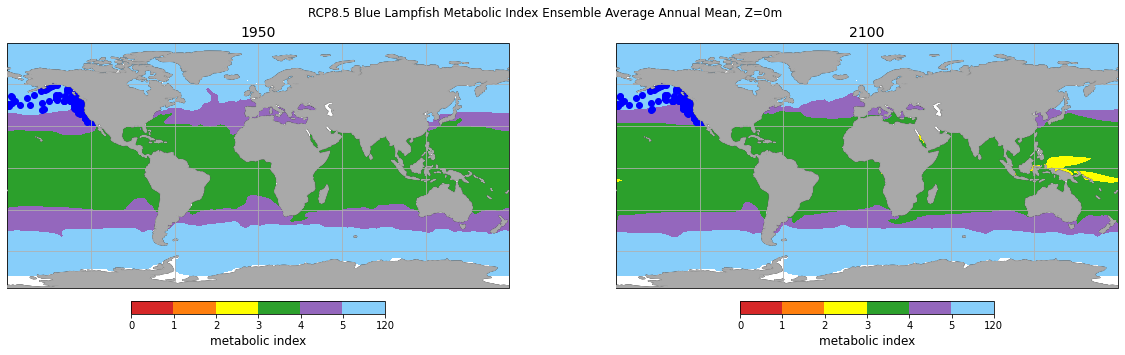

In [82]:
# fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig, (ax0, ax1) = plt.subplots(figsize=(20,5),nrows=1,ncols=2,subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle('RCP8.5 Blue Lampfish Metabolic Index Ensemble Average Annual Mean, Z=0m')
func.graph(trop_all, ax0, '1950', 1950, None, False)
ax0.scatter(blue_lampfish['decimalLongitude'], blue_lampfish['decimalLatitude'],color='blue')
func.graph(trop_all, ax1, '2100', 2100, None, False)
ax1.scatter(blue_lampfish['decimalLongitude'], blue_lampfish['decimalLatitude'],color='blue')

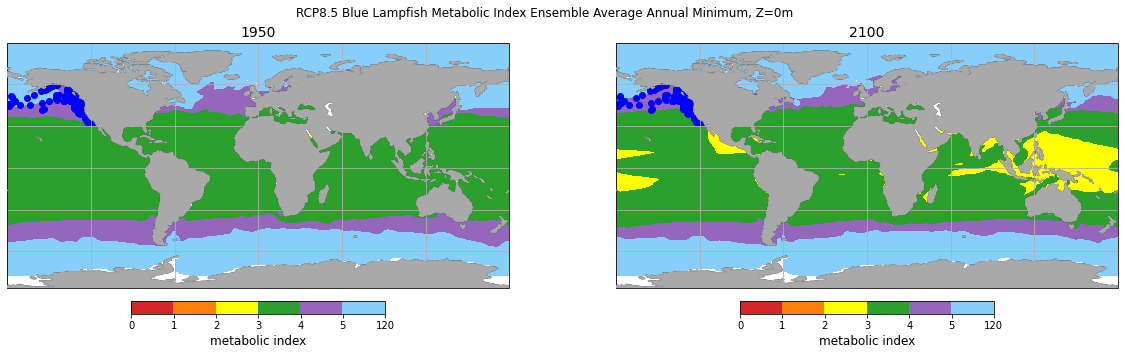

In [83]:
# fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig, (ax0, ax1) = plt.subplots(figsize=(20,5),nrows=1,ncols=2,subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle('RCP8.5 Blue Lampfish Metabolic Index Ensemble Average Annual Minimum, Z=0m')
func.graph(trop_all, ax0, '1950', 1950, None, False)
ax0.scatter(blue_lampfish['decimalLongitude'], blue_lampfish['decimalLatitude'],color='blue')
func.graph(trop_all, ax1, '2100', 2100, None, False)
ax1.scatter(blue_lampfish['decimalLongitude'], blue_lampfish['decimalLatitude'],color='blue')

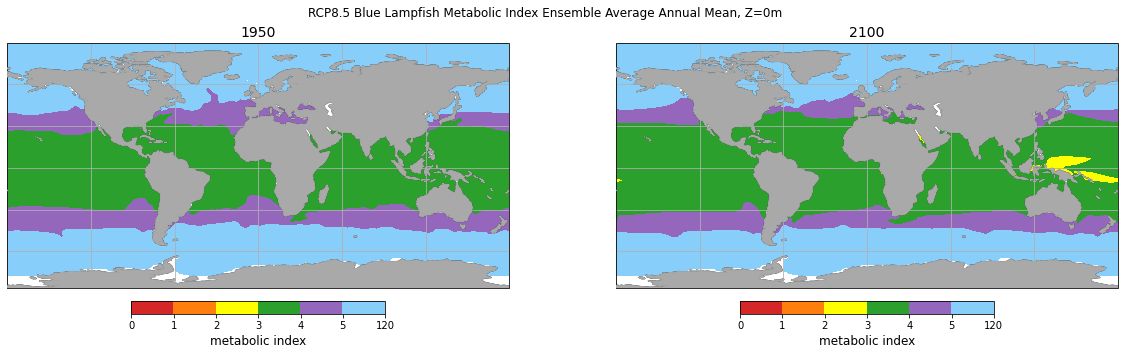

In [76]:
# fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig, (ax0, ax1) = plt.subplots(figsize=(20,5),nrows=1,ncols=2,subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle('RCP8.5 Blue Lampfish Metabolic Index Ensemble Average Annual Mean, Z=0m')
func.graph(trop_all, ax0, '1950', 1950, None, False)
func.graph(trop_all, ax1, '2100', 2100, None, False)

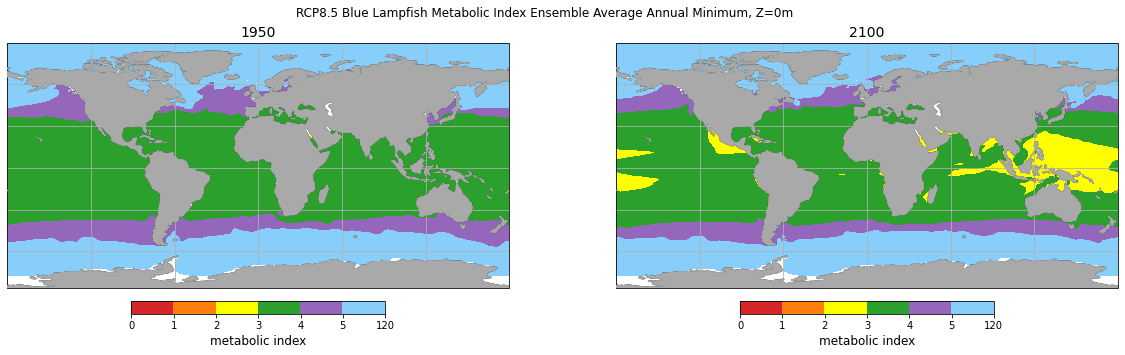

In [84]:
# fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig, (ax0, ax1) = plt.subplots(figsize=(20,5),nrows=1,ncols=2,subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle('RCP8.5 Blue Lampfish Metabolic Index Ensemble Average Annual Minimum, Z=0m')
func.graph(trop_all, ax0, '1950', 1950, None, False)
func.graph(trop_all, ax1, '2100', 2100, None, False)

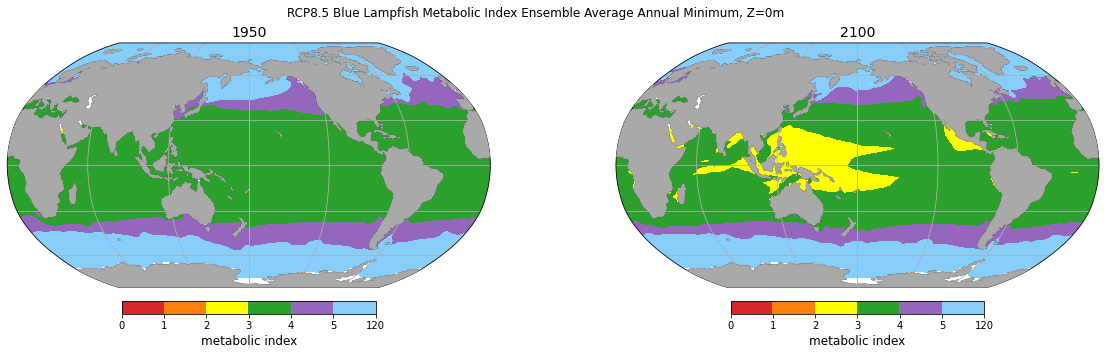

In [85]:
# fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig, (ax0, ax1) = plt.subplots(figsize=(20,5),nrows=1,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Blue Lampfish Metabolic Index Ensemble Average Annual Minimum, Z=0m')
func.graph(trop_all, ax0, '1950', 1950, None, False)
func.graph(trop_all, ax1, '2100', 2100, None, False)

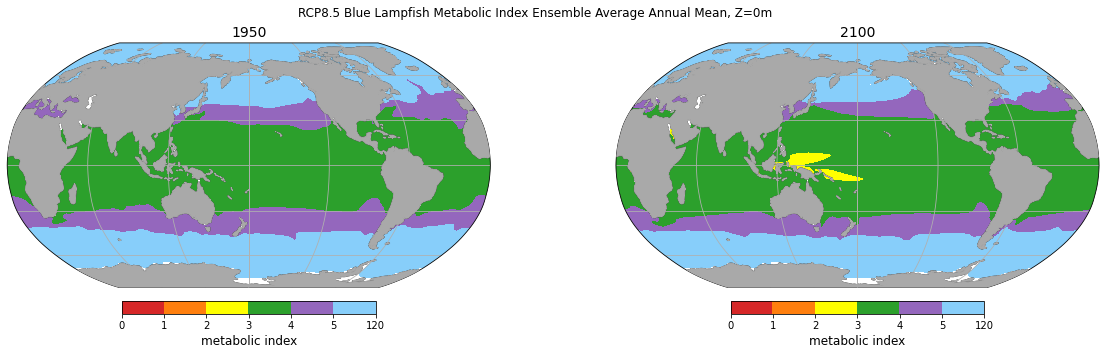

In [77]:
# fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig, (ax0, ax1) = plt.subplots(figsize=(20,5),nrows=1,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Blue Lampfish Metabolic Index Ensemble Average Annual Mean, Z=0m')
func.graph(trop_all, ax0, '1950', 1950, None, False)
func.graph(trop_all, ax1, '2100', 2100, None, False)

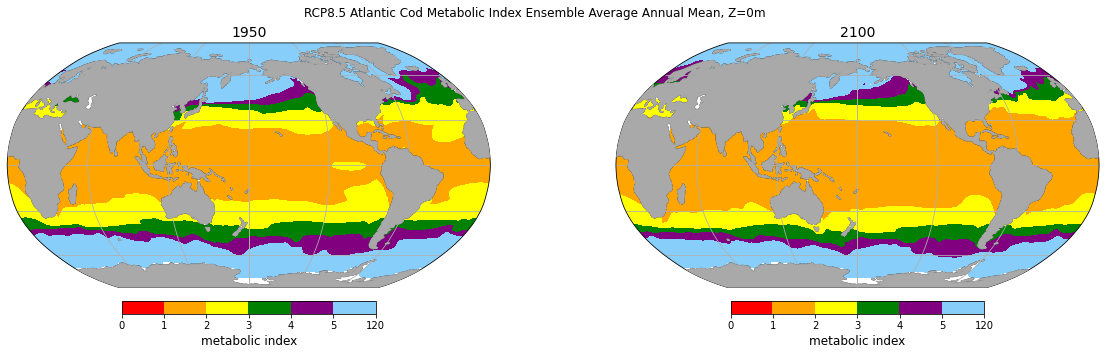

In [8]:
# fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig, (ax0, ax1) = plt.subplots(figsize=(20,5),nrows=1,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Atlantic Cod Metabolic Index Ensemble Average Annual Mean, Z=0m')
func.graph(codAvg, ax0, '1950', 1950, None, False)
func.graph(codAvg, ax1, '2100', 2100, None, False)

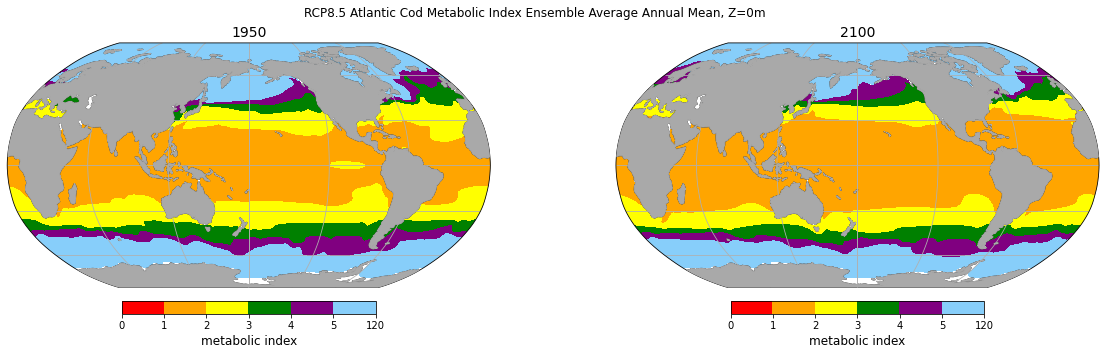

In [9]:
fig, (ax0, ax1) = plt.subplots(figsize=(20,5),nrows=1,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Atlantic Cod Metabolic Index Ensemble Average Annual Mean, Z=0m')
func.graph(cod_all, ax0, '1950', 1950, None, False)
func.graph(cod_all, ax1, '2100', 2100, None, False)

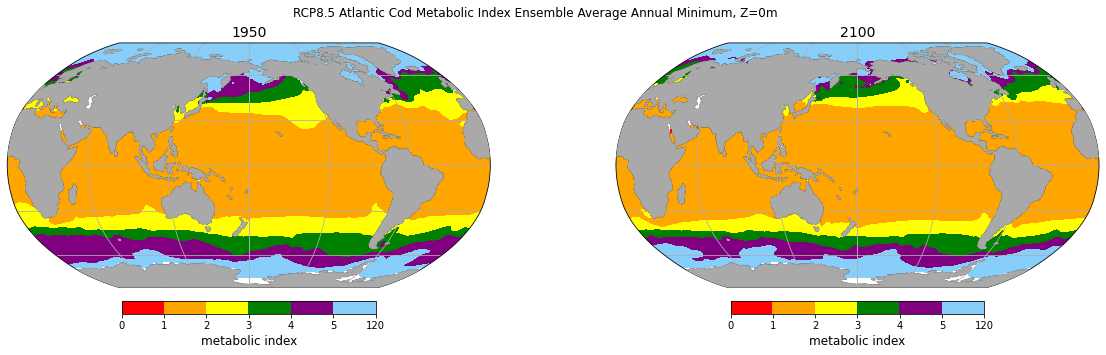

In [11]:
fig, (ax0, ax1) = plt.subplots(figsize=(20,5),nrows=1,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Atlantic Cod Metabolic Index Ensemble Average Annual Minimum, Z=0m')
func.graph(cod_all, ax0, '1950', 1950, None, False)
func.graph(cod_all, ax1, '2100', 2100, None, False)

In [5]:
r = func.find_p(cod_all, 1.0, total)
o = func.find_p(cod_all, 2.0, total)
y = func.find_p(cod_all, 3.0, total)
g = func.find_p(cod_all, 4.0, total)
p = func.find_p(cod_all, 5.0, total)

In [6]:
red = func.find_p(cod_all, 1.0, total)
ora = func.find_p(cod_all, 2.0, total)
yel = func.find_p(cod_all, 3.0, total)
gr = func.find_p(cod_all, 4.0, total)
pur = func.find_p(cod_all, 5.0, total)

Text(0.5, 0, 'Year')

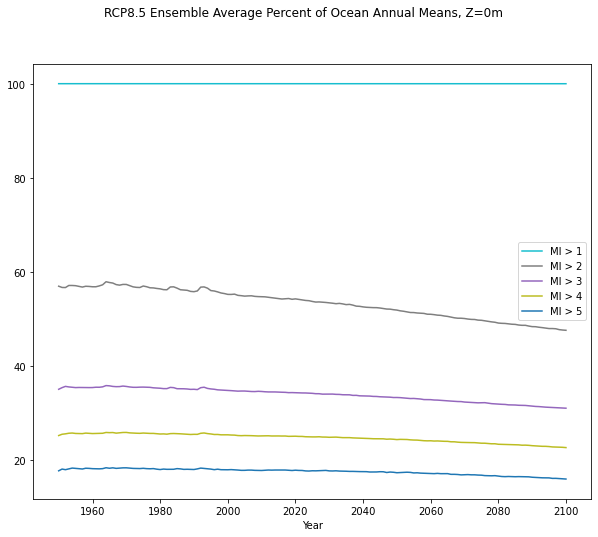

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Ensemble Average Percent of Ocean Annual Means, Z=0m')
wn.filterwarnings('ignore')

# func.plot_allEns(z0_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lightcyan')
# func.plot_allEns(z0_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'whitesmoke')
# func.plot_allEns(z0_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lavender')
ax.plot(np.unique(r['time.year']),r.groupby('time.year').mean(),color='tab:cyan',label='MI > 1')
ax.plot(np.unique(o['time.year']),o.groupby('time.year').mean(),color='tab:gray',label='MI > 2')
ax.plot(np.unique(y['time.year']),y.groupby('time.year').mean(),color='tab:purple',label='MI > 3')
ax.plot(np.unique(g['time.year']),g.groupby('time.year').mean(),color='tab:olive',label='MI > 4')
ax.plot(np.unique(p['time.year']),p.groupby('time.year').mean(),color='tab:blue',label='MI > 5')
ax.legend()
# ax.set_ylim(0,50)
ax.set_xlabel('Year')

In [20]:
redYear = red.groupby('time.year').mean()
orYear = ora.groupby('time.year').mean()
yelYear = yel.groupby('time.year').mean()
grYear = gr.groupby('time.year').mean()
purYear = pur.groupby('time.year').mean()

In [21]:
redMin = redYear.min(dim='ensemble')
redMax = redYear.max(dim='ensemble')
orMin = orYear.min(dim='ensemble')
orMax = orYear.max(dim='ensemble')
yelMin = yelYear.min(dim='ensemble')
yelMax = yelYear.max(dim='ensemble')
grMin = grYear.min(dim='ensemble')
grMax = grYear.max(dim='ensemble')
purMin = purYear.min(dim='ensemble')
purMax = purYear.max(dim='ensemble')

In [22]:
redMin = [100.      ,  99.99887 ,  99.99887 , 100.      ,  99.99915 ,
        99.99943 ,  99.99943 ,  99.99972 ,  99.99972 , 100.      ,
       100.      ,  99.99943 ,  99.99887 ,  99.99943 ,  99.99915 ,
        99.99972 ,  99.99887 ,  99.99887 ,  99.99943 ,  99.99972 ,
        99.99887 , 100.      , 100.      ,  99.99915 ,  99.99859 ,
        99.99943 ,  99.99943 ,  99.99915 ,  99.99972 , 100.      ,
        99.99915 , 100.      ,  99.99972 ,  99.99943 ,  99.982544,
        99.97684 ,  99.99972 ,  99.99943 ,  99.99943 , 100.      ,
        99.99915 ,  99.99943 , 100.      ,  99.99915 ,  99.99972 ,
        99.99972 ,  99.99972 ,  99.99972 ,  99.99943 ,  99.99887 ,
        99.99972 ,  99.99972 ,  99.99972 ,  99.99943 ,  99.99887 ,
        99.99915 ,  99.99972 , 100.      ,  99.99915 ,  99.99943 ,
        99.99943 ,  99.99943 ,  99.99915 ,  99.99943 ,  99.99943 ,
        99.99943 ,  99.99943 ,  99.99943 ,  99.99943 ,  99.99915 ,
        99.99943 ,  99.99915 ,  99.99859 , 100.      ,  99.99943 ,
        99.99972 ,  99.99859 ,  99.99943 ,  99.99972 ,  99.99887 ,
        99.99887 ,  99.99943 ,  99.99948 ,  99.99943 ,  99.999146,
        99.998695,  99.99972 ,  99.99915 ,  99.99866 ,  99.99839 ,
        99.99866 ,  99.9992  ,  99.998634,  99.99841 ,  99.998924,
        99.998695,  99.9979  ,  99.99868 ,  99.99787 ,  99.99819 ,
        99.997375,  99.997375,  99.996315,  99.996826,  99.99762 ,
        99.99707 ,  99.99625 ,  99.99707 ,  99.99685 ,  99.99658 ,
        99.996864,  99.99634 ,  99.995476,  99.996826,  99.99656 ,
        99.99582 ,  99.994415,  99.99472 ,  99.994804,  99.994606,
        99.99656 ,  99.99502 ,  99.995544,  99.99423 ,  99.99579 ,
        99.995056,  99.992516,  99.99447 ,  99.99271 ,  99.993004,
        99.99276 ,  99.993935,  99.99247 ,  99.992455,  99.99203 ,
        99.99276 ,  99.99375 ,  99.9918  ,  99.9927  ,  99.98893 ,
        99.99044 ,  99.98935 ,  99.991425,  99.99118 ,  99.987305,
        99.98739 ,  99.985374,  99.98354 ,  99.98844 ,  99.98806 ,
        99.986855]
redMax = [100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      ,  99.99973 ,
        99.99973 , 100.      , 100.      ,  99.99923 ,  99.99923 ,
        99.99896 ,  99.99868 ,  99.99923 ,  99.99896 ,  99.99894 ,
        99.99792 ,  99.99896 , 100.      ,  99.99844 ,  99.99817 ,
        99.99896 ,  99.99743 ,  99.99766 ,  99.998695,  99.99811 ,
        99.99766 ,  99.99766 ,  99.997375,  99.9974  ,  99.99766 ,
        99.998146,  99.99714 ,  99.996605,  99.99691 ,  99.99713 ,
        99.99658 ,  99.996315,  99.99762 ,  99.995766,  99.99685 ,
        99.99656 ]

In [31]:
orMax = [57.779835, 57.639206, 57.526657, 57.709454, 57.794636, 57.827805,
       57.747395, 57.624874, 57.813084, 57.863758, 57.776127, 57.78182 ,
       57.6916  , 58.056168, 59.147617, 58.296555, 58.410976, 58.02336 ,
       57.940445, 58.086117, 57.975204, 57.682255, 57.548267, 57.423885,
       57.532734, 57.645214, 57.842957, 57.41742 , 57.276978, 57.19157 ,
       57.12413 , 56.97957 , 56.77264 , 57.79259 , 57.506405, 57.551243,
       57.15424 , 56.908092, 56.745724, 56.639862, 56.76186 , 56.55396 ,
       57.81369 , 57.637676, 57.277466, 56.516006, 56.596615, 56.30362 ,
       56.346634, 56.085846, 56.276104, 55.71345 , 55.950714, 55.725933,
       55.821377, 55.479767, 55.828323, 55.38297 , 55.560837, 55.47223 ,
       55.443634, 55.367065, 55.140533, 54.994457, 54.999897, 54.83617 ,
       54.841625, 55.39822 , 55.12903 , 55.023   , 55.0334  , 54.916645,
       54.63571 , 54.81871 , 54.573154, 54.31    , 54.089985, 54.15886 ,
       54.22665 , 54.0459  , 53.946976, 53.993908, 54.05153 , 53.855495,
       53.66496 , 54.27003 , 53.751965, 53.560787, 53.124516, 53.043808,
       53.330032, 52.91939 , 52.945606, 52.823986, 53.131668, 53.188477,
       52.71153 , 52.669224, 52.647003, 52.476395, 52.71571 , 52.265827,
       52.135075, 51.952347, 51.792744, 52.16332 , 51.728436, 51.60576 ,
       51.482803, 51.76347 , 51.59701 , 51.378445, 51.4323  , 51.10785 ,
       51.136673, 51.20094 , 50.957626, 50.555004, 50.534428, 50.747227,
       50.77054 , 50.557983, 50.318584, 50.416553, 50.30511 , 50.250828,
       49.973083, 50.05689 , 49.816265, 49.731525, 49.517612, 49.26305 ,
       49.53422 , 49.277477, 49.242462, 49.37195 , 49.302364, 49.168163,
       49.20113 , 48.90282 , 48.75061 , 48.742325, 48.66864 , 48.658794,
       48.338963, 48.331894, 48.31676 , 48.27788 , 48.04973 , 48.032345,
       48.08046 ]
orMin = [56.232853, 55.958405, 56.062428, 56.388317, 56.36687 , 56.27651 ,
       56.040195, 56.033566, 55.730434, 56.139194, 56.030582, 55.801327,
       56.108856, 56.38092 , 56.459232, 56.89186 , 56.703613, 56.61833 ,
       56.32745 , 56.689693, 56.578472, 56.148853, 56.068348, 55.75729 ,
       55.66928 , 55.97632 , 56.089634, 55.765194, 55.5614  , 55.25005 ,
       55.748623, 55.33142 , 55.17578 , 56.11162 , 56.108917, 55.484818,
       55.150547, 55.522594, 54.87579 , 54.872105, 55.00525 , 55.063614,
       55.65506 , 55.841442, 55.586452, 54.686024, 55.209232, 54.89658 ,
       54.50641 , 54.66313 , 54.2845  , 54.23895 , 54.436527, 54.191547,
       53.766617, 54.136066, 54.197475, 54.206394, 53.95403 , 53.878998,
       54.108257, 53.98341 , 54.10664 , 53.789288, 53.439728, 53.74232 ,
       53.60614 , 53.479458, 53.487167, 53.399124, 53.585804, 53.299038,
       53.14105 , 52.93465 , 53.02066 , 52.98296 , 52.872807, 52.559727,
       52.800365, 52.755142, 52.683186, 52.62131 , 52.77643 , 52.53397 ,
       52.398335, 52.153736, 52.404522, 52.15038 , 51.980618, 52.029587,
       51.837467, 51.91884 , 51.76547 , 51.847855, 51.51466 , 51.73084 ,
       51.639465, 51.479614, 51.605465, 51.227016, 51.24403 , 51.05876 ,
       50.997715, 51.03105 , 50.85907 , 50.627132, 50.575455, 50.771282,
       50.55452 , 50.51475 , 50.30652 , 50.403507, 50.248505, 50.311054,
       50.175655, 49.832783, 49.759705, 49.74734 , 49.580883, 49.61543 ,
       49.32021 , 49.61124 , 49.483074, 49.45552 , 49.21208 , 48.979282,
       48.942657, 48.991135, 48.92209 , 48.768127, 48.79187 , 48.71968 ,
       48.6395  , 48.51839 , 47.844776, 48.258194, 47.89314 , 48.194485,
       47.991837, 48.042557, 47.75411 , 47.942196, 47.71062 , 47.734055,
       47.46005 , 47.38045 , 47.62321 , 47.440674, 47.418728, 47.238796,
       47.145542]

In [32]:
yelMax = [35.506077, 35.696518, 35.917194, 35.82951 , 35.86201 , 35.68046 ,
       35.698544, 35.673115, 35.768944, 35.673534, 35.842945, 35.923634,
       35.834568, 36.06483 , 36.022667, 36.203938, 35.974815, 35.826565,
       35.853584, 36.231403, 35.93758 , 35.896446, 35.756367, 35.948864,
       35.845047, 35.782917, 35.818897, 35.865086, 35.775295, 35.612797,
       35.58237 , 35.451687, 35.463047, 35.807083, 35.6678  , 35.37589 ,
       35.448757, 35.49032 , 35.52218 , 35.364994, 35.30297 , 35.39005 ,
       35.78755 , 35.93833 , 35.504025, 35.46477 , 35.248726, 35.18777 ,
       35.156414, 35.38145 , 35.140774, 35.199432, 35.083954, 35.180573,
       35.050823, 34.99473 , 35.002636, 34.999542, 34.81513 , 35.077324,
       34.914227, 34.892544, 34.75748 , 34.857273, 34.872444, 34.875813,
       34.82207 , 34.764706, 34.674576, 34.94274 , 34.63351 , 34.70531 ,
       34.89944 , 34.575996, 34.55438 , 34.5543  , 34.397205, 34.511536,
       34.47488 , 34.518322, 34.41872 , 34.44073 , 34.42021 , 34.19842 ,
       34.166615, 34.277782, 34.276997, 34.13706 , 34.106915, 33.930767,
       33.885494, 33.866604, 33.86918 , 33.79871 , 33.855118, 33.618202,
       33.75679 , 33.68485 , 33.550022, 33.65192 , 33.884403, 33.54809 ,
       33.422577, 33.351513, 33.67036 , 33.291542, 33.31963 , 33.15729 ,
       33.084026, 33.168365, 33.0961  , 33.03198 , 32.971478, 32.98014 ,
       32.95937 , 32.90184 , 32.928165, 32.776344, 32.730022, 32.844456,
       32.699253, 32.510868, 32.57977 , 32.471333, 32.334805, 32.51529 ,
       32.49666 , 32.262287, 32.320858, 32.14735 , 32.116978, 32.075016,
       32.113323, 31.941263, 31.905296, 32.22768 , 31.86777 , 31.807135,
       31.895767, 31.794226, 31.748644, 31.693857, 31.562195, 31.531672,
       31.560095, 31.715105, 31.410513, 31.2388  , 31.307938, 31.211283,
       31.225592]
yelMin = [34.422787, 34.902596, 35.21101 , 35.24779 , 35.156437, 35.03733 ,
       35.013123, 35.06931 , 35.069916, 35.09199 , 34.91247 , 35.047077,
       34.94631 , 35.220013, 35.37592 , 35.38778 , 35.210117, 35.18236 ,
       35.286472, 35.263897, 35.005787, 35.08184 , 35.04771 , 34.987034,
       35.00087 , 35.072987, 34.936947, 34.998257, 34.935074, 34.837345,
       34.763657, 34.71744 , 34.75241 , 34.91386 , 35.08777 , 34.91367 ,
       34.783283, 34.77982 , 34.597973, 34.560116, 34.343624, 34.49184 ,
       34.73688 , 34.807446, 34.582874, 34.540947, 34.506832, 34.400116,
       34.363094, 34.364956, 34.412907, 34.37995 , 34.261967, 34.040268,
       34.203022, 34.2628  , 34.07487 , 34.045765, 34.048946, 34.265682,
       34.0816  , 34.031933, 34.091927, 34.093925, 34.064342, 33.975266,
       33.992374, 33.813564, 33.772667, 33.80481 , 33.80476 , 33.675396,
       33.916508, 33.650288, 33.692795, 33.77282 , 33.6052  , 33.63756 ,
       33.50253 , 33.628532, 33.449963, 33.40521 , 33.50366 , 33.56585 ,
       33.48897 , 33.413525, 33.45145 , 33.255177, 33.303432, 33.100414,
       33.26642 , 33.274956, 33.294376, 33.10765 , 33.06749 , 33.145527,
       32.920486, 33.12308 , 32.997677, 32.919556, 32.835514, 32.907715,
       32.65589 , 32.770496, 32.71451 , 32.58691 , 32.68787 , 32.568096,
       32.45866 , 32.577133, 32.427048, 32.326096, 32.304783, 32.19918 ,
       32.26396 , 32.097435, 32.163837, 32.138935, 32.082478, 31.949808,
       31.852888, 32.040226, 31.994337, 31.916903, 31.75718 , 31.721037,
       31.705551, 31.755777, 31.586031, 31.4899  , 31.473139, 31.449066,
       31.457052, 31.176104, 31.324965, 31.299532, 31.231642, 31.25099 ,
       31.304604, 31.129827, 31.144056, 31.04117 , 30.946213, 30.87912 ,
       30.857405, 30.908064, 30.92867 , 30.691675, 30.799887, 30.575186,
       30.711975]

In [33]:
grMax = [25.604403, 25.829071, 25.781298, 25.962545, 26.033415, 25.855345,
       26.090464, 25.982529, 26.05262 , 25.986536, 25.94901 , 26.060251,
       25.871626, 26.009405, 26.165575, 26.10064 , 26.146736, 26.145082,
       26.042732, 26.269585, 26.28248 , 26.166204, 26.077684, 25.976713,
       26.193924, 26.088526, 25.950197, 25.992105, 25.904444, 26.07097 ,
       25.943443, 25.841293, 25.987207, 26.048712, 26.030502, 25.959574,
       25.805977, 25.788202, 25.867838, 25.966948, 25.743872, 25.695017,
       25.974295, 26.154417, 26.019125, 25.928057, 25.82599 , 25.885698,
       25.718145, 25.770102, 25.762957, 25.605318, 25.609344, 25.637657,
       25.616205, 25.601976, 25.534803, 25.444862, 25.429766, 25.425974,
       25.4495  , 25.392778, 25.406792, 25.413475, 25.54949 , 25.418892,
       25.401793, 25.571144, 25.515455, 25.378517, 25.324247, 25.382586,
       25.609488, 25.305573, 25.318811, 25.313662, 25.282   , 25.248789,
       25.236639, 25.342863, 25.345083, 25.160486, 25.122679, 25.262426,
       25.094093, 25.114065, 25.04119 , 25.048227, 25.187561, 24.984495,
       24.895233, 24.92423 , 24.818323, 24.805918, 24.695074, 24.867147,
       24.729279, 24.714933, 24.687704, 24.631563, 24.515627, 24.681112,
       24.600103, 24.51945 , 24.503447, 24.529303, 24.406357, 24.454294,
       24.38658 , 24.479853, 24.337866, 24.283945, 24.310564, 24.182653,
       24.202593, 24.177717, 24.125525, 24.046783, 24.016584, 24.134514,
       24.135254, 23.943514, 23.996126, 24.032568, 23.901674, 23.954268,
       23.979042, 23.855715, 23.719213, 23.743805, 23.627314, 23.572046,
       23.487597, 23.540535, 23.440659, 23.59281 , 23.453054, 23.44198 ,
       23.467344, 23.374687, 23.285254, 23.24246 , 23.17263 , 23.251764,
       23.115324, 22.965075, 23.075968, 22.937727, 22.957685, 22.910013,
       22.948557]
grMin = [24.595526, 24.965014, 25.095253, 25.248436, 25.442823, 25.009054,
       25.142557, 25.29801 , 25.179634, 25.26026 , 25.131536, 25.1504  ,
       25.156815, 25.205841, 25.19987 , 25.40349 , 25.4281  , 25.142561,
       25.175896, 25.375452, 25.387747, 25.414118, 25.156706, 25.110952,
       24.853914, 25.155602, 25.273779, 25.253996, 25.262543, 25.155748,
       24.889715, 24.97423 , 25.054878, 25.032204, 25.16054 , 24.995398,
       25.119928, 25.11569 , 25.08491 , 24.80092 , 24.942513, 24.866867,
       25.088577, 25.157099, 24.945656, 24.644156, 24.454758, 24.651888,
       24.452436, 24.448309, 24.67098 , 24.37823 , 24.600573, 24.546522,
       24.60584 , 24.623087, 24.693659, 24.520391, 24.373148, 24.413826,
       24.482277, 24.717743, 24.488016, 24.360857, 24.665367, 24.681047,
       24.484451, 24.50692 , 24.584198, 24.405123, 24.540113, 24.610662,
       24.4428  , 24.26666 , 24.260305, 24.34978 , 24.395773, 24.39639 ,
       24.413605, 24.406115, 24.38825 , 24.472288, 24.494934, 24.33761 ,
       24.159071, 24.14829 , 24.315819, 24.28039 , 24.060991, 24.076525,
       24.162888, 24.135645, 24.04954 , 24.11743 , 24.17782 , 24.021675,
       24.25521 , 24.073837, 24.076715, 24.036201, 23.942244, 23.821497,
       24.020086, 24.034262, 23.766489, 23.640879, 23.741282, 23.65912 ,
       23.72618 , 23.63027 , 23.709175, 23.754972, 23.75471 , 23.621359,
       23.668886, 23.608412, 23.4767  , 23.509409, 23.46404 , 23.324982,
       23.3219  , 23.220098, 23.354073, 23.331644, 23.105131, 23.05323 ,
       23.089796, 23.137384, 23.089943, 23.04631 , 22.987457, 22.956802,
       22.6566  , 22.761803, 22.885286, 22.855438, 22.810442, 22.6825  ,
       22.700201, 22.836008, 22.547121, 22.601522, 22.637314, 22.439432,
       22.327913, 22.441523, 22.350473, 22.411882, 22.467108, 22.29484 ,
       22.189117]

In [34]:
purMax = [18.40434 , 18.515467, 18.309782, 18.519163, 18.602697, 18.895521,
       18.672705, 18.678226, 18.906195, 18.701777, 18.593725, 18.604012,
       18.449518, 18.568829, 18.753546, 18.619371, 19.006517, 18.81915 ,
       18.734438, 18.861418, 18.997145, 18.84444 , 18.638985, 18.6429  ,
       18.708242, 18.983889, 18.671242, 18.783808, 18.592825, 18.490248,
       18.609709, 18.542032, 18.57737 , 18.670933, 18.57194 , 18.754314,
       18.578308, 18.497807, 18.713005, 18.773413, 18.765978, 18.470655,
       18.67565 , 18.755617, 18.6656  , 18.656513, 18.781656, 18.654062,
       18.525257, 18.670355, 18.53251 , 18.545519, 18.520687, 18.52228 ,
       18.459429, 18.423683, 18.506891, 18.42002 , 18.444784, 18.459394,
       18.362349, 18.212824, 18.437925, 18.334276, 18.514677, 18.393267,
       18.3646  , 18.294949, 18.23242 , 18.274355, 18.24986 , 18.212347,
       18.318693, 18.209902, 18.175344, 18.462698, 18.114626, 18.419502,
       18.300404, 18.2223  , 18.172853, 18.187998, 18.148054, 18.2508  ,
       18.405092, 17.98651 , 18.032297, 18.077614, 18.129625, 17.990376,
       17.86301 , 17.865028, 17.870193, 17.861565, 17.882254, 17.915651,
       17.916826, 17.748625, 17.856062, 17.762804, 17.650225, 17.815193,
       17.658422, 17.76872 , 17.637062, 17.482607, 17.642017, 17.582615,
       17.576757, 17.66843 , 17.447939, 17.535568, 17.705227, 17.33817 ,
       17.497747, 17.4375  , 17.256691, 17.409422, 17.136915, 17.325424,
       17.196981, 17.258987, 17.147434, 17.142527, 17.169344, 17.126558,
       17.012815, 16.988697, 16.95544 , 17.144335, 16.971603, 16.843868,
       16.895817, 16.913824, 16.806364, 16.956083, 16.857721, 16.869555,
       16.872229, 16.78723 , 16.687618, 16.706324, 16.597792, 16.524221,
       16.595243, 16.445745, 16.512033, 16.38037 , 16.231997, 16.27043 ,
       16.373802]
purMin = [17.04923  , 17.428997 , 17.43115  , 17.500334 , 17.74671  ,
       17.341208 , 17.483255 , 17.508472 , 17.470316 , 17.611462 ,
       17.454964 , 17.573687 , 17.253618 , 17.32559  , 17.476149 ,
       17.74129  , 17.696089 , 17.52948  , 17.391678 , 17.779604 ,
       17.663786 , 17.726587 , 17.560133 , 17.624775 , 17.304352 ,
       17.597895 , 17.47228  , 17.208858 , 17.642828 , 17.492094 ,
       17.232128 , 17.46     , 17.292624 , 17.164923 , 17.40257  ,
       17.101316 , 17.014322 , 17.234728 , 17.394518 , 17.009686 ,
       16.959177 , 17.35433  , 17.558737 , 17.305765 , 17.161993 ,
       16.842894 , 16.71977  , 16.881983 , 16.470533 , 16.595705 ,
       16.746675 , 16.799353 , 16.747974 , 17.08053  , 17.005367 ,
       16.812656 , 17.173826 , 17.320717 , 17.006218 , 17.034744 ,
       16.73129  , 17.059599 , 17.02028  , 17.186502 , 17.133131 ,
       17.235231 , 16.933935 , 17.056608 , 16.965687 , 16.897623 ,
       17.015291 , 17.255407 , 17.053469 , 16.984919 , 16.766    ,
       16.93203  , 17.044533 , 16.943403 , 17.101027 , 17.17751  ,
       16.661282 , 17.109415 , 16.973995 , 17.00402  , 16.81714  ,
       16.662802 , 16.852049 , 16.79104  , 16.686481 , 16.720182 ,
       16.782522 , 16.691412 , 16.742264 , 16.974592 , 16.931326 ,
       16.752443 , 17.183355 , 16.877884 , 16.826109 , 16.814642 ,
       16.590448 , 16.771296 , 16.630606 , 16.961191 , 16.577097 ,
       16.327963 , 16.51911  , 16.663733 , 16.665916 , 16.522839 ,
       16.492285 , 16.577986 , 16.694754 , 16.500603 , 16.711916 ,
       16.712196 , 16.31503  , 16.4166   , 16.396156 , 16.272444 ,
       16.330477 , 16.308962 , 16.45547  , 16.23424  , 16.225676 ,
       15.9063425, 16.11091  , 16.028078 , 15.960514 , 15.759597 ,
       16.06796  , 15.924862 , 15.869678 , 15.634327 , 15.935529 ,
       15.917239 , 15.799611 , 15.763343 , 15.850495 , 15.84375  ,
       15.698215 , 15.733269 , 15.7749605, 15.399924 , 15.523793 ,
       15.636765 , 15.615916 , 15.684159 , 15.681256 , 15.731687 ,
       15.28197  ]

In [36]:
r = r.groupby('time.year').mean()
o = o.groupby('time.year').mean()
y = y.groupby('time.year').mean()
g = g.groupby('time.year').mean()
p = p.groupby('time.year').mean()

In [42]:
redAvg = [100.      ,  99.99996 ,  99.9999  , 100.      ,  99.99994 ,
        99.99998 ,  99.99994 ,  99.99998 ,  99.99998 , 100.      ,
       100.      ,  99.99997 ,  99.99994 ,  99.99997 ,  99.99997 ,
        99.99998 ,  99.99994 ,  99.999916,  99.99996 ,  99.99997 ,
        99.99994 , 100.      , 100.      ,  99.99994 ,  99.99995 ,
        99.99996 ,  99.99997 ,  99.99996 ,  99.99998 , 100.      ,
        99.999916, 100.      ,  99.99999 ,  99.99998 ,  99.99936 ,
        99.99923 ,  99.99999 ,  99.99997 ,  99.99996 , 100.      ,
        99.99995 ,  99.99995 , 100.      ,  99.99995 ,  99.99999 ,
        99.99999 ,  99.99998 ,  99.99997 ,  99.99997 ,  99.99996 ,
        99.99999 ,  99.99999 ,  99.99997 ,  99.99997 ,  99.99994 ,
        99.99996 ,  99.99999 , 100.      ,  99.99996 ,  99.99996 ,
        99.99996 ,  99.99997 ,  99.99996 ,  99.99994 ,  99.99997 ,
        99.99995 ,  99.99995 ,  99.99995 ,  99.99996 ,  99.99993 ,
        99.999916,  99.999916,  99.99987 , 100.      ,  99.9999  ,
        99.99996 ,  99.999886,  99.99994 ,  99.99997 ,  99.99988 ,
        99.9999  ,  99.99995 ,  99.99996 ,  99.999886,  99.99985 ,
        99.999756,  99.99995 ,  99.99982 ,  99.99973 ,  99.99973 ,
        99.99967 ,  99.99985 ,  99.99972 ,  99.99973 ,  99.99982 ,
        99.99958 ,  99.99951 ,  99.99957 ,  99.99949 ,  99.99943 ,
        99.99948 ,  99.9992  ,  99.99879 ,  99.99884 ,  99.998985,
        99.99875 ,  99.99848 ,  99.9986  ,  99.99859 ,  99.998535,
        99.99869 ,  99.99813 ,  99.997826,  99.998146,  99.9981  ,
        99.99777 ,  99.99777 ,  99.99731 ,  99.99723 ,  99.99722 ,
        99.99761 ,  99.99703 ,  99.99709 ,  99.99709 ,  99.99714 ,
        99.996704,  99.996376,  99.99664 ,  99.996605,  99.996605,
        99.9963  ,  99.99621 ,  99.996025,  99.995735,  99.995674,
        99.9958  ,  99.996   ,  99.99558 ,  99.9953  ,  99.99503 ,
        99.99472 ,  99.994576,  99.99438 ,  99.993935,  99.9935  ,
        99.993416,  99.99305 ,  99.993095,  99.99247 ,  99.99307 ,
        99.9925  ]
orAvg = [56.91572 , 56.647602, 56.6302  , 57.071537, 57.068024, 57.02444 ,
       56.879364, 56.731754, 56.90317 , 56.86507 , 56.794735, 56.795177,
       56.975666, 57.217426, 57.86447 , 57.700684, 57.584698, 57.25462 ,
       57.1375  , 57.29477 , 57.28891 , 57.024464, 56.775864, 56.669964,
       56.639664, 56.952457, 56.80513 , 56.577744, 56.55122 , 56.436935,
       56.351704, 56.18317 , 56.157284, 56.749203, 56.779953, 56.502567,
       56.16193 , 56.108124, 56.041424, 55.810726, 55.748867, 55.905987,
       56.718967, 56.762466, 56.49736 , 55.98141 , 55.896362, 55.704037,
       55.473785, 55.348972, 55.17539 , 55.163975, 55.227276, 54.96793 ,
       54.898067, 54.803375, 54.85031 , 54.87352 , 54.751713, 54.70245 ,
       54.681843, 54.65242 , 54.56377 , 54.480408, 54.398067, 54.303104,
       54.187084, 54.239834, 54.29538 , 54.13173 , 54.218655, 54.10823 ,
       54.00511 , 53.885952, 53.832733, 53.671078, 53.541092, 53.567657,
       53.520447, 53.45604 , 53.378796, 53.294754, 53.192814, 53.260723,
       53.14853 , 52.997158, 53.05022 , 52.88913 , 52.67032 , 52.63319 ,
       52.51253 , 52.430836, 52.388195, 52.35622 , 52.349945, 52.274597,
       52.173416, 52.053974, 52.033184, 51.914806, 51.834644, 51.675785,
       51.581436, 51.460743, 51.317932, 51.30573 , 51.2161  , 51.179676,
       51.12619 , 50.957035, 50.94403 , 50.864624, 50.75578 , 50.713657,
       50.579544, 50.490665, 50.337673, 50.191555, 50.105534, 50.099854,
       50.040127, 49.92683 , 49.852108, 49.83492 , 49.700016, 49.664734,
       49.549442, 49.414722, 49.325108, 49.24466 , 49.0748  , 49.018356,
       48.99262 , 48.9046  , 48.824314, 48.79091 , 48.657547, 48.59308 ,
       48.595383, 48.436535, 48.3149  , 48.296753, 48.184933, 48.10181 ,
       47.992477, 47.903748, 47.90419 , 47.859818, 47.67406 , 47.59041 ,
       47.53468 ]
yelAvg = [34.98516 , 35.33325 , 35.602165, 35.485004, 35.42584 , 35.343845,
       35.37049 , 35.360317, 35.362015, 35.34586 , 35.353855, 35.42226 ,
       35.414707, 35.5022  , 35.769615, 35.71845 , 35.594288, 35.540543,
       35.557392, 35.668182, 35.58817 , 35.479065, 35.406864, 35.40213 ,
       35.43796 , 35.448673, 35.421246, 35.39792 , 35.296925, 35.262966,
       35.206165, 35.1258  , 35.12708 , 35.386246, 35.329853, 35.106255,
       35.104122, 35.09128 , 35.047516, 34.964252, 34.98698 , 34.917286,
       35.32649 , 35.42139 , 35.170048, 35.055992, 34.988308, 34.866795,
       34.829205, 34.81039 , 34.757168, 34.69515 , 34.633404, 34.589264,
       34.612648, 34.611656, 34.55102 , 34.51061 , 34.498703, 34.55339 ,
       34.518307, 34.456436, 34.420597, 34.41766 , 34.415226, 34.374638,
       34.355465, 34.334244, 34.26653 , 34.279835, 34.25113 , 34.230106,
       34.20473 , 34.197834, 34.16177 , 34.12438 , 34.04685 , 34.04245 ,
       33.950645, 33.961227, 33.949642, 33.963688, 33.90546 , 33.8912  ,
       33.82199 , 33.821907, 33.807404, 33.686527, 33.695877, 33.593033,
       33.56977 , 33.537434, 33.536808, 33.47017 , 33.4557  , 33.391888,
       33.366474, 33.34515 , 33.303707, 33.232845, 33.237392, 33.205853,
       33.14688 , 33.072216, 33.014736, 33.033646, 32.96811 , 32.91321 ,
       32.794075, 32.796795, 32.777073, 32.701496, 32.683083, 32.635403,
       32.571545, 32.550068, 32.473766, 32.419575, 32.38017 , 32.36574 ,
       32.268654, 32.231148, 32.21707 , 32.16546 , 32.100643, 32.108097,
       32.137516, 32.0271  , 31.928156, 31.875948, 31.834967, 31.787603,
       31.761148, 31.672424, 31.654604, 31.639006, 31.582365, 31.556887,
       31.546339, 31.468063, 31.409353, 31.334778, 31.30271 , 31.232916,
       31.182503, 31.149672, 31.134947, 31.07099 , 31.034956, 30.999298,
       30.960432]
grAvg = [25.142578, 25.417206, 25.505066, 25.631548, 25.6755  , 25.587667,
       25.559694, 25.55062 , 25.660109, 25.611326, 25.565239, 25.580627,
       25.585096, 25.625902, 25.798254, 25.75849 , 25.783035, 25.655188,
       25.723984, 25.79474 , 25.803947, 25.71013 , 25.665289, 25.636108,
       25.614052, 25.672956, 25.626757, 25.597021, 25.597403, 25.530828,
       25.468779, 25.491905, 25.434027, 25.552149, 25.573149, 25.544235,
       25.511263, 25.458784, 25.419495, 25.369463, 25.403488, 25.394842,
       25.623642, 25.687418, 25.559248, 25.477743, 25.368044, 25.372309,
       25.297201, 25.295893, 25.29836 , 25.251541, 25.231445, 25.141035,
       25.113997, 25.14341 , 25.136902, 25.115364, 25.080864, 25.0521  ,
       25.074408, 25.081247, 25.092201, 25.04815 , 25.060005, 25.055696,
       25.037056, 25.042847, 24.972624, 24.985342, 24.999632, 24.959145,
       24.953379, 24.888168, 24.86738 , 24.852196, 24.853127, 24.882103,
       24.821024, 24.814222, 24.771387, 24.793367, 24.807741, 24.760084,
       24.696962, 24.701721, 24.697248, 24.640877, 24.616531, 24.57855 ,
       24.587181, 24.556717, 24.502417, 24.462914, 24.460144, 24.471735,
       24.446299, 24.362871, 24.398088, 24.35258 , 24.281042, 24.32982 ,
       24.314323, 24.298979, 24.225855, 24.185684, 24.172081, 24.106009,
       24.041014, 24.014856, 24.028038, 23.972208, 23.992693, 23.947084,
       23.917887, 23.908371, 23.81376 , 23.811632, 23.734833, 23.686333,
       23.665335, 23.647097, 23.636717, 23.62922 , 23.571756, 23.511885,
       23.508932, 23.452345, 23.388987, 23.393738, 23.287659, 23.263689,
       23.218933, 23.2209  , 23.204458, 23.148903, 23.160933, 23.087942,
       23.100546, 23.058474, 22.986982, 22.941042, 22.908531, 22.85155 ,
       22.846342, 22.798395, 22.71856 , 22.70392 , 22.668901, 22.639046,
       22.578527]
purAvg = [17.640734, 18.010345, 17.878788, 18.04927 , 18.218569, 18.16507 ,
       18.092278, 18.023169, 18.18838 , 18.156414, 18.095388, 18.078764,
       18.057547, 18.100462, 18.290575, 18.184717, 18.2753  , 18.15697 ,
       18.218992, 18.26815 , 18.275038, 18.213068, 18.151184, 18.124146,
       18.116488, 18.172777, 18.10174 , 18.072577, 18.111723, 17.988588,
       17.907484, 18.009306, 17.954845, 17.948696, 17.96601 , 18.104675,
       18.04857 , 17.94442 , 17.96629 , 17.933954, 17.918322, 18.04738 ,
       18.215567, 18.151548, 18.075014, 18.0031  , 17.882296, 17.985495,
       17.877039, 17.85925 , 17.859867, 17.895546, 17.8592  , 17.801085,
       17.738256, 17.742132, 17.790161, 17.7883  , 17.738907, 17.724012,
       17.707754, 17.754131, 17.804567, 17.782927, 17.806276, 17.802444,
       17.799887, 17.805468, 17.744286, 17.704428, 17.769142, 17.722485,
       17.711376, 17.61506 , 17.590117, 17.649086, 17.634598, 17.674854,
       17.693857, 17.725994, 17.620047, 17.604855, 17.640661, 17.582445,
       17.576279, 17.54772 , 17.51349 , 17.516388, 17.490564, 17.47079 ,
       17.469168, 17.457397, 17.384552, 17.392035, 17.394537, 17.448835,
       17.436825, 17.277525, 17.375967, 17.328028, 17.229925, 17.278307,
       17.30545 , 17.34121 , 17.305237, 17.185753, 17.21855 , 17.147028,
       17.12074 , 17.088163, 17.069542, 17.037329, 17.091055, 17.03081 ,
       17.041416, 17.038126, 16.887915, 16.890665, 16.85491 , 16.771967,
       16.81036 , 16.834162, 16.785505, 16.786097, 16.732536, 16.709257,
       16.620064, 16.59808 , 16.578375, 16.608057, 16.507301, 16.427418,
       16.396973, 16.432293, 16.410944, 16.380781, 16.404959, 16.395292,
       16.402557, 16.358332, 16.272038, 16.224394, 16.184155, 16.150757,
       16.149261, 16.133585, 16.028923, 16.03614 , 15.990191, 15.957261,
       15.890246]

Text(0.5, 0, 'Year')

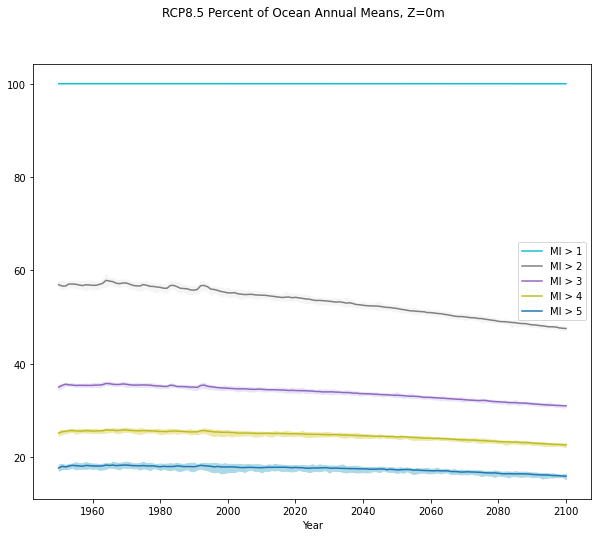

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Percent of Ocean Annual Means, Z=0m')
wn.filterwarnings('ignore')
years = np.arange(1950, 2101)
# func.plot_allEns(red, ax, 'lightcyan')
# func.plot_allEns(ora, ax, 'whitesmoke')
# func.plot_allEns(yel, ax, 'lavender')
# func.plot_allEns(gr, ax, 'palegoldenrod')
# func.plot_allEns(pur, ax, 'lightblue')
ax.fill_between(years, redMax, redMin, color='lightcyan')
ax.fill_between(years, orMax, orMin, color='whitesmoke')
ax.fill_between(years, yelMax, yelMin, color='lavender')
ax.fill_between(years, grMax, grMin, color='palegoldenrod')
ax.fill_between(years, purMax, purMin, color='lightblue')
ax.plot(years, redAvg, color='tab:cyan', label='MI > 1')
ax.plot(years, orAvg, color='tab:gray', label='MI > 2')
ax.plot(years, yelAvg, color='tab:purple', label='MI > 3')
ax.plot(years, grAvg, color='tab:olive', label='MI > 4')
ax.plot(years, purAvg, color='tab:blue', label='MI > 5')
ax.legend()
# ax.set_ylim(0,50)
ax.set_xlabel('Year')

In [8]:
r = func.find_p(cod_all, 1.0, total)
o = func.find_p(cod_all, 2.0, total)
y = func.find_p(cod_all, 3.0, total)
g = func.find_p(cod_all, 4.0, total)
p = func.find_p(cod_all, 5.0, total)

In [9]:
rMin = r.groupby('time.year').min()
oMin = o.groupby('time.year').min()
yMin = y.groupby('time.year').min()
gMin = g.groupby('time.year').min()
pMin = p.groupby('time.year').min()

In [5]:
red = func.find_p(cod_all, 1.0, total)
ora = func.find_p(cod_all, 2.0, total)
yel = func.find_p(cod_all, 3.0, total)
gr = func.find_p(cod_all, 4.0, total)
pur = func.find_p(cod_all, 5.0, total)

In [6]:
redYear = red.groupby('time.year').min()
orYear = ora.groupby('time.year').min()
yelYear = yel.groupby('time.year').min()
grYear = gr.groupby('time.year').min()
purYear = pur.groupby('time.year').min()

In [7]:
redMin = redYear.min(dim='ensemble')
redMax = redYear.max(dim='ensemble')
orMin = orYear.min(dim='ensemble')
orMax = orYear.max(dim='ensemble')
yelMin = yelYear.min(dim='ensemble')
yelMax = yelYear.max(dim='ensemble')
grMin = grYear.min(dim='ensemble')
grMax = grYear.max(dim='ensemble')
purMin = purYear.min(dim='ensemble')
purMax = purYear.max(dim='ensemble')

In [8]:
rMin = [100.      ,  99.99977 ,  99.99966 , 100.      ,  99.99977 ,
        99.999886,  99.99966 ,  99.999886,  99.99977 , 100.      ,
       100.      ,  99.99977 ,  99.99977 ,  99.999886,  99.999886,
        99.999886,  99.99977 ,  99.99966 ,  99.99977 ,  99.99977 ,
        99.99977 , 100.      , 100.      ,  99.99966 ,  99.999886,
        99.99977 ,  99.99977 ,  99.999886,  99.999886, 100.      ,
        99.99966 , 100.      ,  99.999886,  99.999886,  99.99783 ,
        99.99841 ,  99.999886,  99.999886,  99.99977 , 100.      ,
        99.99977 ,  99.99977 , 100.      ,  99.99966 ,  99.999886,
        99.999886,  99.999886,  99.99977 ,  99.999886,  99.999886,
        99.999886,  99.999886,  99.999886,  99.99977 ,  99.99977 ,
        99.999886,  99.999886, 100.      ,  99.99977 ,  99.99966 ,
        99.99977 ,  99.99977 ,  99.99977 ,  99.99977 ,  99.99977 ,
        99.999886,  99.99954 ,  99.99977 ,  99.99977 ,  99.99966 ,
        99.99966 ,  99.99966 ,  99.99954 , 100.      ,  99.99943 ,
        99.99977 ,  99.99932 ,  99.99954 ,  99.999886,  99.99954 ,
        99.99966 ,  99.99977 ,  99.99977 ,  99.99943 ,  99.9992  ,
        99.99907 ,  99.99966 ,  99.999214,  99.998955,  99.99886 ,
        99.99834 ,  99.99917 ,  99.99907 ,  99.99865 ,  99.99906 ,
        99.99782 ,  99.99782 ,  99.99803 ,  99.997086,  99.9973  ,
        99.9973  ,  99.995636,  99.99355 ,  99.99407 ,  99.9946  ,
        99.99355 ,  99.99095 ,  99.99263 ,  99.991066,  99.990845,
        99.99262 ,  99.98991 ,  99.988014,  99.989815,  99.98918 ,
        99.98843 ,  99.987465,  99.98581 ,  99.98486 ,  99.98592 ,
        99.98647 ,  99.98413 ,  99.984024,  99.98491 ,  99.983406,
        99.98181 ,  99.98076 ,  99.981705,  99.982864,  99.982666,
        99.98079 ,  99.97962 ,  99.97972 ,  99.97997 ,  99.978935,
        99.97879 ,  99.97907 ,  99.97736 ,  99.977394,  99.97668 ,
        99.97612 ,  99.97536 ,  99.97562 ,  99.973114,  99.97119 ,
        99.968475,  99.97088 ,  99.96841 ,  99.96704 ,  99.969   ,
        99.96763 ]
oMin = [53.493492, 54.06007 , 53.818165, 54.11371 , 54.060066, 54.093426,
       53.966595, 53.88873 , 53.868816, 53.914917, 53.77721 , 53.827557,
       53.96552 , 53.94706 , 54.882195, 54.712353, 54.69385 , 54.29272 ,
       54.187954, 54.419155, 54.182617, 54.07757 , 53.728592, 53.825073,
       53.540005, 53.826073, 53.881695, 53.726162, 53.53717 , 53.51638 ,
       53.394455, 53.295296, 53.04611 , 53.763462, 53.868156, 53.704998,
       53.173073, 53.199184, 53.12028 , 52.94359 , 52.69639 , 52.804924,
       53.702507, 53.92846 , 53.60014 , 53.119606, 52.91168 , 52.740402,
       52.560898, 52.493187, 52.286793, 52.19006 , 52.125645, 52.029514,
       51.89846 , 51.93192 , 51.90985 , 51.858635, 51.771484, 51.718822,
       51.729916, 51.60795 , 51.49401 , 51.456142, 51.397877, 51.342648,
       51.280952, 51.17465 , 51.224133, 51.09929 , 51.17549 , 50.920303,
       50.890194, 50.86876 , 50.692326, 50.71019 , 50.522755, 50.423515,
       50.434937, 50.303818, 50.33905 , 50.232246, 50.21261 , 50.04503 ,
       49.961613, 49.93688 , 49.93304 , 49.952442, 49.582752, 49.731167,
       49.399498, 49.285465, 49.26567 , 49.169743, 49.180813, 49.193367,
       49.02818 , 48.94681 , 48.922176, 48.756153, 48.729958, 48.49632 ,
       48.346806, 48.351692, 48.180897, 48.137043, 48.13419 , 47.97194 ,
       47.95186 , 47.840923, 47.77455 , 47.683434, 47.53235 , 47.645466,
       47.48041 , 47.302555, 47.253407, 47.04498 , 46.925175, 46.88001 ,
       46.87203 , 46.768967, 46.657787, 46.609943, 46.45502 , 46.550602,
       46.317463, 46.2498  , 46.1222  , 46.09983 , 46.015118, 45.93076 ,
       45.84851 , 45.82793 , 45.752857, 45.589848, 45.518223, 45.35415 ,
       45.39947 , 45.2375  , 45.23191 , 45.171314, 45.09011 , 44.970276,
       44.82915 , 44.748047, 44.776436, 44.669468, 44.47565 , 44.460285,
       44.37097 ]
yMin = [32.754883, 33.216713, 33.457493, 33.419537, 33.33351 , 33.25415 ,
       33.232872, 33.245487, 33.26393 , 33.365887, 33.268375, 33.30506 ,
       33.318157, 33.302876, 33.55199 , 33.437233, 33.293617, 33.315136,
       33.349144, 33.438683, 33.482906, 33.323635, 33.289207, 33.337   ,
       33.366356, 33.344753, 33.33663 , 33.298542, 33.222694, 33.14114 ,
       33.12447 , 33.066357, 33.04041 , 33.17667 , 33.311985, 33.06739 ,
       32.958706, 32.9963  , 32.965504, 32.99445 , 32.981728, 32.851757,
       33.039997, 33.325768, 33.142612, 32.99633 , 32.948204, 32.79779 ,
       32.785316, 32.781246, 32.73049 , 32.64839 , 32.609356, 32.518913,
       32.588383, 32.60338 , 32.53017 , 32.532692, 32.40431 , 32.480618,
       32.51382 , 32.430748, 32.382286, 32.360027, 32.35869 , 32.336422,
       32.321762, 32.278618, 32.2097  , 32.184593, 32.160538, 32.14924 ,
       32.069054, 32.116806, 32.061844, 32.02306 , 32.049526, 31.96368 ,
       31.965454, 31.887156, 31.913042, 31.961452, 31.842098, 31.900175,
       31.746256, 31.793945, 31.765377, 31.733757, 31.688717, 31.593494,
       31.59329 , 31.49493 , 31.55057 , 31.468204, 31.443409, 31.370335,
       31.314491, 31.338465, 31.317554, 31.263561, 31.210579, 31.22625 ,
       31.150003, 31.103289, 31.020424, 31.036964, 30.99823 , 31.037683,
       30.864376, 30.877415, 30.84958 , 30.811441, 30.724255, 30.744362,
       30.671692, 30.598833, 30.664715, 30.535084, 30.459167, 30.479223,
       30.408382, 30.36432 , 30.38844 , 30.319157, 30.234852, 30.225737,
       30.303968, 30.254305, 30.098898, 30.0433  , 29.953547, 30.001068,
       29.94178 , 29.86825 , 29.822681, 29.802822, 29.728828, 29.737703,
       29.647932, 29.64205 , 29.55334 , 29.58329 , 29.465202, 29.428427,
       29.41055 , 29.369267, 29.371525, 29.281063, 29.288754, 29.226377,
       29.270702]
gMin = [22.309502, 22.911665, 22.671328, 23.04642 , 23.16641 , 22.99526 ,
       22.948002, 22.74851 , 23.038828, 22.994177, 22.883139, 22.931616,
       22.959673, 22.85415 , 23.181295, 22.944218, 23.195686, 22.761953,
       22.96348 , 23.024885, 22.984062, 22.941406, 22.816996, 22.842749,
       22.678253, 23.018637, 22.968534, 22.91947 , 23.065369, 22.874853,
       22.71578 , 22.964504, 22.872395, 22.777088, 22.788439, 23.001867,
       22.900333, 22.79345 , 22.75741 , 22.70445 , 22.811365, 23.055868,
       23.187399, 23.184605, 23.061136, 22.948141, 22.697811, 22.916342,
       22.761408, 22.77906 , 22.879782, 22.915205, 22.905083, 22.795738,
       22.735506, 22.779684, 22.757902, 22.783657, 22.752205, 22.685667,
       22.574678, 22.668217, 22.847467, 22.761904, 22.882502, 22.848658,
       22.774939, 22.858025, 22.808012, 22.66874 , 22.76611 , 22.692175,
       22.653582, 22.45638 , 22.49451 , 22.577353, 22.655334, 22.693884,
       22.683758, 22.746195, 22.698523, 22.56407 , 22.646778, 22.617962,
       22.579756, 22.463428, 22.59768 , 22.557398, 22.545584, 22.446318,
       22.538801, 22.476519, 22.340101, 22.354603, 22.404736, 22.437551,
       22.53462 , 22.22308 , 22.444437, 22.420162, 22.213188, 22.310877,
       22.401045, 22.447783, 22.30389 , 22.13695 , 22.275509, 22.171814,
       22.150791, 22.05477 , 22.090584, 22.111452, 22.156736, 22.123945,
       22.152752, 22.184053, 21.890804, 22.017828, 21.917477, 21.783598,
       21.821535, 21.926447, 21.906425, 21.89685 , 21.841057, 21.739372,
       21.738768, 21.686274, 21.67702 , 21.72874 , 21.567465, 21.557455,
       21.472944, 21.566866, 21.544817, 21.480425, 21.55362 , 21.502508,
       21.556835, 21.482553, 21.40662 , 21.344824, 21.312263, 21.237825,
       21.325565, 21.331093, 21.098772, 21.203773, 21.186274, 21.181038,
       21.044739]
pMin = [12.956295 , 14.120798 , 13.7203045, 14.068056 , 14.604236 ,
       14.395711 , 14.262416 , 13.800268 , 14.35203  , 14.176774 ,
       13.945552 , 14.138241 , 14.05495  , 14.140313 , 14.476758 ,
       13.857108 , 14.384643 , 13.908774 , 14.094875 , 14.283488 ,
       14.207803 , 14.090607 , 13.91037  , 13.962067 , 13.889563 ,
       14.108028 , 14.158523 , 14.069083 , 14.352936 , 14.006669 ,
       13.723678 , 14.053446 , 14.116811 , 13.880846 , 13.724753 ,
       14.340391 , 14.271798 , 13.9415245, 14.085071 , 14.108913 ,
       14.137988 , 14.633551 , 14.82264  , 14.624861 , 14.475059 ,
       14.376052 , 14.088449 , 14.500582 , 14.251703 , 14.181423 ,
       14.411588 , 14.520877 , 14.547135 , 14.352111 , 14.220457 ,
       14.362747 , 14.467881 , 14.511324 , 14.428504 , 14.408944 ,
       14.294376 , 14.531183 , 14.687461 , 14.715196 , 14.837393 ,
       14.688357 , 14.786194 , 14.907607 , 14.760688 , 14.448863 ,
       14.834808 , 14.561222 , 14.5689945, 14.244488 , 14.255391 ,
       14.432255 , 14.459435 , 14.707419 , 14.747248 , 15.045874 ,
       14.638642 , 14.623113 , 14.769614 , 14.589691 , 14.653068 ,
       14.476985 , 14.455913 , 14.47008  , 14.507768 , 14.52175  ,
       14.563173 , 14.624097 , 14.202678 , 14.449282 , 14.551192 ,
       14.645802 , 14.821973 , 14.11591  , 14.664835 , 14.480428 ,
       14.3115835, 14.276713 , 14.667048 , 14.808863 , 14.63132  ,
       14.232459 , 14.491199 , 14.285252 , 14.299931 , 14.161053 ,
       14.124188 , 14.183528 , 14.499045 , 14.282676 , 14.447054 ,
       14.524473 , 13.961226 , 14.127032 , 14.14025  , 13.845777 ,
       13.990136 , 14.22855  , 14.127532 , 14.131067 , 14.040348 ,
       14.143923 , 13.844924 , 13.842655 , 13.991848 , 14.170337 ,
       13.887353 , 13.727509 , 13.662472 , 13.8744545, 13.87499  ,
       13.8751955, 13.803409 , 13.868973 , 14.044693 , 13.962678 ,
       13.727358 , 13.694355 , 13.699261 , 13.515731 , 13.672329 ,
       13.810203 , 13.443661 , 13.529277 , 13.454226 , 13.509805 ,
       13.385692 ]

In [13]:
rMin.load()

<xarray.DataArray (year: 151)>
array([100.      ,  99.99977 ,  99.99966 , 100.      ,  99.99977 ,
        99.999886,  99.99966 ,  99.999886,  99.99977 , 100.      ,
       100.      ,  99.99977 ,  99.99977 ,  99.999886,  99.999886,
        99.999886,  99.99977 ,  99.99966 ,  99.99977 ,  99.99977 ,
        99.99977 , 100.      , 100.      ,  99.99966 ,  99.999886,
        99.99977 ,  99.99977 ,  99.999886,  99.999886, 100.      ,
        99.99966 , 100.      ,  99.999886,  99.999886,  99.99783 ,
        99.99841 ,  99.999886,  99.999886,  99.99977 , 100.      ,
        99.99977 ,  99.99977 , 100.      ,  99.99966 ,  99.999886,
        99.999886,  99.999886,  99.99977 ,  99.999886,  99.999886,
        99.999886,  99.999886,  99.999886,  99.99977 ,  99.99977 ,
        99.999886,  99.999886, 100.      ,  99.99977 ,  99.99966 ,
        99.99977 ,  99.99977 ,  99.99977 ,  99.99977 ,  99.99977 ,
        99.999886,  99.99954 ,  99.99977 ,  99.99977 ,  99.99966 ,
        99.99966 ,  99.99966 ,  99.99954 , 100.      ,  99.99943 ,
        99.99977 ,  99.99932 ,  99.99954 ,  99.999886,  99.99954 ,
        99.99966 ,  99.99977 ,  99.99977 ,  99.99943 ,  99.9992  ,
        99.99907 ,  99.99966 ,  99.999214,  99.998955,  99.99886 ,
        99.99834 ,  99.99917 ,  99.99907 ,  99.99865 ,  99.99906 ,
        99.99782 ,  99.99782 ,  99.99803 ,  99.997086,  99.9973  ,
        99.9973  ,  99.995636,  99.99355 ,  99.99407 ,  99.9946  ,
        99.99355 ,  99.99095 ,  99.99263 ,  99.991066,  99.990845,
        99.99262 ,  99.98991 ,  99.988014,  99.989815,  99.98918 ,
        99.98843 ,  99.987465,  99.98581 ,  99.98486 ,  99.98592 ,
        99.98647 ,  99.98413 ,  99.984024,  99.98491 ,  99.983406,
        99.98181 ,  99.98076 ,  99.981705,  99.982864,  99.982666,
        99.98079 ,  99.97962 ,  99.97972 ,  99.97997 ,  99.978935,
        99.97879 ,  99.97907 ,  99.97736 ,  99.977394,  99.97668 ,
        99.97612 ,  99.97536 ,  99.97562 ,  99.973114,  99.97119 ,
        99.968475,  99.97088 ,  99.96841 ,  99.96704 ,  99.969   ,
        99.96763 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [14]:
oMin.load()

<xarray.DataArray (year: 151)>
array([53.493492, 54.06007 , 53.818165, 54.11371 , 54.060066, 54.093426,
       53.966595, 53.88873 , 53.868816, 53.914917, 53.77721 , 53.827557,
       53.96552 , 53.94706 , 54.882195, 54.712353, 54.69385 , 54.29272 ,
       54.187954, 54.419155, 54.182617, 54.07757 , 53.728592, 53.825073,
       53.540005, 53.826073, 53.881695, 53.726162, 53.53717 , 53.51638 ,
       53.394455, 53.295296, 53.04611 , 53.763462, 53.868156, 53.704998,
       53.173073, 53.199184, 53.12028 , 52.94359 , 52.69639 , 52.804924,
       53.702507, 53.92846 , 53.60014 , 53.119606, 52.91168 , 52.740402,
       52.560898, 52.493187, 52.286793, 52.19006 , 52.125645, 52.029514,
       51.89846 , 51.93192 , 51.90985 , 51.858635, 51.771484, 51.718822,
       51.729916, 51.60795 , 51.49401 , 51.456142, 51.397877, 51.342648,
       51.280952, 51.17465 , 51.224133, 51.09929 , 51.17549 , 50.920303,
       50.890194, 50.86876 , 50.692326, 50.71019 , 50.522755, 50.423515,
       50.434937, 50.303818, 50.33905 , 50.232246, 50.21261 , 50.04503 ,
       49.961613, 49.93688 , 49.93304 , 49.952442, 49.582752, 49.731167,
       49.399498, 49.285465, 49.26567 , 49.169743, 49.180813, 49.193367,
       49.02818 , 48.94681 , 48.922176, 48.756153, 48.729958, 48.49632 ,
       48.346806, 48.351692, 48.180897, 48.137043, 48.13419 , 47.97194 ,
       47.95186 , 47.840923, 47.77455 , 47.683434, 47.53235 , 47.645466,
       47.48041 , 47.302555, 47.253407, 47.04498 , 46.925175, 46.88001 ,
       46.87203 , 46.768967, 46.657787, 46.609943, 46.45502 , 46.550602,
       46.317463, 46.2498  , 46.1222  , 46.09983 , 46.015118, 45.93076 ,
       45.84851 , 45.82793 , 45.752857, 45.589848, 45.518223, 45.35415 ,
       45.39947 , 45.2375  , 45.23191 , 45.171314, 45.09011 , 44.970276,
       44.82915 , 44.748047, 44.776436, 44.669468, 44.47565 , 44.460285,
       44.37097 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [15]:
yMin.load()

<xarray.DataArray (year: 151)>
array([32.754883, 33.216713, 33.457493, 33.419537, 33.33351 , 33.25415 ,
       33.232872, 33.245487, 33.26393 , 33.365887, 33.268375, 33.30506 ,
       33.318157, 33.302876, 33.55199 , 33.437233, 33.293617, 33.315136,
       33.349144, 33.438683, 33.482906, 33.323635, 33.289207, 33.337   ,
       33.366356, 33.344753, 33.33663 , 33.298542, 33.222694, 33.14114 ,
       33.12447 , 33.066357, 33.04041 , 33.17667 , 33.311985, 33.06739 ,
       32.958706, 32.9963  , 32.965504, 32.99445 , 32.981728, 32.851757,
       33.039997, 33.325768, 33.142612, 32.99633 , 32.948204, 32.79779 ,
       32.785316, 32.781246, 32.73049 , 32.64839 , 32.609356, 32.518913,
       32.588383, 32.60338 , 32.53017 , 32.532692, 32.40431 , 32.480618,
       32.51382 , 32.430748, 32.382286, 32.360027, 32.35869 , 32.336422,
       32.321762, 32.278618, 32.2097  , 32.184593, 32.160538, 32.14924 ,
       32.069054, 32.116806, 32.061844, 32.02306 , 32.049526, 31.96368 ,
       31.965454, 31.887156, 31.913042, 31.961452, 31.842098, 31.900175,
       31.746256, 31.793945, 31.765377, 31.733757, 31.688717, 31.593494,
       31.59329 , 31.49493 , 31.55057 , 31.468204, 31.443409, 31.370335,
       31.314491, 31.338465, 31.317554, 31.263561, 31.210579, 31.22625 ,
       31.150003, 31.103289, 31.020424, 31.036964, 30.99823 , 31.037683,
       30.864376, 30.877415, 30.84958 , 30.811441, 30.724255, 30.744362,
       30.671692, 30.598833, 30.664715, 30.535084, 30.459167, 30.479223,
       30.408382, 30.36432 , 30.38844 , 30.319157, 30.234852, 30.225737,
       30.303968, 30.254305, 30.098898, 30.0433  , 29.953547, 30.001068,
       29.94178 , 29.86825 , 29.822681, 29.802822, 29.728828, 29.737703,
       29.647932, 29.64205 , 29.55334 , 29.58329 , 29.465202, 29.428427,
       29.41055 , 29.369267, 29.371525, 29.281063, 29.288754, 29.226377,
       29.270702], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [16]:
gMin.load()

<xarray.DataArray (year: 151)>
array([22.309502, 22.911665, 22.671328, 23.04642 , 23.16641 , 22.99526 ,
       22.948002, 22.74851 , 23.038828, 22.994177, 22.883139, 22.931616,
       22.959673, 22.85415 , 23.181295, 22.944218, 23.195686, 22.761953,
       22.96348 , 23.024885, 22.984062, 22.941406, 22.816996, 22.842749,
       22.678253, 23.018637, 22.968534, 22.91947 , 23.065369, 22.874853,
       22.71578 , 22.964504, 22.872395, 22.777088, 22.788439, 23.001867,
       22.900333, 22.79345 , 22.75741 , 22.70445 , 22.811365, 23.055868,
       23.187399, 23.184605, 23.061136, 22.948141, 22.697811, 22.916342,
       22.761408, 22.77906 , 22.879782, 22.915205, 22.905083, 22.795738,
       22.735506, 22.779684, 22.757902, 22.783657, 22.752205, 22.685667,
       22.574678, 22.668217, 22.847467, 22.761904, 22.882502, 22.848658,
       22.774939, 22.858025, 22.808012, 22.66874 , 22.76611 , 22.692175,
       22.653582, 22.45638 , 22.49451 , 22.577353, 22.655334, 22.693884,
       22.683758, 22.746195, 22.698523, 22.56407 , 22.646778, 22.617962,
       22.579756, 22.463428, 22.59768 , 22.557398, 22.545584, 22.446318,
       22.538801, 22.476519, 22.340101, 22.354603, 22.404736, 22.437551,
       22.53462 , 22.22308 , 22.444437, 22.420162, 22.213188, 22.310877,
       22.401045, 22.447783, 22.30389 , 22.13695 , 22.275509, 22.171814,
       22.150791, 22.05477 , 22.090584, 22.111452, 22.156736, 22.123945,
       22.152752, 22.184053, 21.890804, 22.017828, 21.917477, 21.783598,
       21.821535, 21.926447, 21.906425, 21.89685 , 21.841057, 21.739372,
       21.738768, 21.686274, 21.67702 , 21.72874 , 21.567465, 21.557455,
       21.472944, 21.566866, 21.544817, 21.480425, 21.55362 , 21.502508,
       21.556835, 21.482553, 21.40662 , 21.344824, 21.312263, 21.237825,
       21.325565, 21.331093, 21.098772, 21.203773, 21.186274, 21.181038,
       21.044739], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [17]:
pMin.load()

<xarray.DataArray (year: 151)>
array([12.956295 , 14.120798 , 13.7203045, 14.068056 , 14.604236 ,
       14.395711 , 14.262416 , 13.800268 , 14.35203  , 14.176774 ,
       13.945552 , 14.138241 , 14.05495  , 14.140313 , 14.476758 ,
       13.857108 , 14.384643 , 13.908774 , 14.094875 , 14.283488 ,
       14.207803 , 14.090607 , 13.91037  , 13.962067 , 13.889563 ,
       14.108028 , 14.158523 , 14.069083 , 14.352936 , 14.006669 ,
       13.723678 , 14.053446 , 14.116811 , 13.880846 , 13.724753 ,
       14.340391 , 14.271798 , 13.9415245, 14.085071 , 14.108913 ,
       14.137988 , 14.633551 , 14.82264  , 14.624861 , 14.475059 ,
       14.376052 , 14.088449 , 14.500582 , 14.251703 , 14.181423 ,
       14.411588 , 14.520877 , 14.547135 , 14.352111 , 14.220457 ,
       14.362747 , 14.467881 , 14.511324 , 14.428504 , 14.408944 ,
       14.294376 , 14.531183 , 14.687461 , 14.715196 , 14.837393 ,
       14.688357 , 14.786194 , 14.907607 , 14.760688 , 14.448863 ,
       14.834808 , 14.561222 , 14.5689945, 14.244488 , 14.255391 ,
       14.432255 , 14.459435 , 14.707419 , 14.747248 , 15.045874 ,
       14.638642 , 14.623113 , 14.769614 , 14.589691 , 14.653068 ,
       14.476985 , 14.455913 , 14.47008  , 14.507768 , 14.52175  ,
       14.563173 , 14.624097 , 14.202678 , 14.449282 , 14.551192 ,
       14.645802 , 14.821973 , 14.11591  , 14.664835 , 14.480428 ,
       14.3115835, 14.276713 , 14.667048 , 14.808863 , 14.63132  ,
       14.232459 , 14.491199 , 14.285252 , 14.299931 , 14.161053 ,
       14.124188 , 14.183528 , 14.499045 , 14.282676 , 14.447054 ,
       14.524473 , 13.961226 , 14.127032 , 14.14025  , 13.845777 ,
       13.990136 , 14.22855  , 14.127532 , 14.131067 , 14.040348 ,
       14.143923 , 13.844924 , 13.842655 , 13.991848 , 14.170337 ,
       13.887353 , 13.727509 , 13.662472 , 13.8744545, 13.87499  ,
       13.8751955, 13.803409 , 13.868973 , 14.044693 , 13.962678 ,
       13.727358 , 13.694355 , 13.699261 , 13.515731 , 13.672329 ,
       13.810203 , 13.443661 , 13.529277 , 13.454226 , 13.509805 ,
       13.385692 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [18]:
redMin.load()

<xarray.DataArray (year: 151)>
array([100.      ,  99.99661 ,  99.99661 , 100.      ,  99.996605,
        99.99661 ,  99.996605,  99.99661 ,  99.99661 , 100.      ,
       100.      ,  99.99661 ,  99.99661 ,  99.996605,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.996605,  99.99661 ,
        99.99661 , 100.      , 100.      ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 , 100.      ,
        99.99661 , 100.      ,  99.99661 ,  99.99661 ,  99.93511 ,
        99.95243 ,  99.996605,  99.996605,  99.99661 , 100.      ,
        99.996605,  99.996605, 100.      ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.996605,  99.99661 ,  99.99661 ,
        99.99661 ,  99.996605,  99.996605,  99.99661 ,  99.99661 ,
        99.996605,  99.99661 , 100.      ,  99.99661 ,  99.996605,
        99.996605,  99.996605,  99.996605,  99.996605,  99.996605,
        99.996605,  99.99661 ,  99.996605,  99.996605,  99.996605,
        99.996605,  99.996605,  99.996605, 100.      ,  99.996605,
        99.996605,  99.996605,  99.996605,  99.996605,  99.996605,
        99.996605,  99.996605,  99.99376 ,  99.99376 ,  99.99322 ,
        99.99065 ,  99.996605,  99.99065 ,  99.99065 ,  99.98752 ,
        99.987495,  99.99376 ,  99.98752 ,  99.98752 ,  99.98752 ,
        99.98752 ,  99.98752 ,  99.98752 ,  99.98437 ,  99.987495,
        99.98437 ,  99.98437 ,  99.98437 ,  99.98122 ,  99.98437 ,
        99.98437 ,  99.98437 ,  99.98437 ,  99.97803 ,  99.97803 ,
        99.97803 ,  99.97803 ,  99.97803 ,  99.98122 ,  99.97803 ,
        99.97803 ,  99.97127 ,  99.97803 ,  99.97803 ,  99.97233 ,
        99.97803 ,  99.97486 ,  99.97518 ,  99.96294 ,  99.97486 ,
        99.971664,  99.956894,  99.97214 ,  99.94762 ,  99.953804,
        99.96294 ,  99.96004 ,  99.94443 ,  99.956665,  99.953766,
        99.956955,  99.95991 ,  99.94179 ,  99.959755,  99.93543 ,
        99.94173 ,  99.938545,  99.94173 ,  99.93827 ,  99.93553 ,
        99.91988 ,  99.93252 ,  99.92317 ,  99.93255 ,  99.93543 ,
        99.91988 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [19]:
redMax.load()

<xarray.DataArray (year: 151)>
array([100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      ,  99.99689 ,
        99.99689 , 100.      , 100.      ,  99.99065 ,  99.99065 ,
        99.98752 ,  99.99065 ,  99.99065 ,  99.98752 ,  99.99065 ,
        99.984436,  99.98752 , 100.      ,  99.9909  ,  99.99083 ,
        99.98752 ,  99.98437 ,  99.98752 ,  99.98437 ,  99.98752 ,
        99.98752 ,  99.98437 ,  99.984436,  99.98437 ,  99.98437 ,
        99.98437 ,  99.98437 ,  99.98122 ,  99.97803 ,  99.97803 ,
        99.98122 ,  99.97803 ,  99.984436,  99.97486 ,  99.98122 ,
        99.98752 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [16]:
redMin = [100.      ,  99.99661 ,  99.99661 , 100.      ,  99.996605,
        99.99661 ,  99.996605,  99.99661 ,  99.99661 , 100.      ,
       100.      ,  99.99661 ,  99.99661 ,  99.996605,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.996605,  99.99661 ,
        99.99661 , 100.      , 100.      ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 , 100.      ,
        99.99661 , 100.      ,  99.99661 ,  99.99661 ,  99.93511 ,
        99.95243 ,  99.996605,  99.996605,  99.99661 , 100.      ,
        99.996605,  99.996605, 100.      ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.996605,  99.99661 ,  99.99661 ,
        99.99661 ,  99.996605,  99.996605,  99.99661 ,  99.99661 ,
        99.996605,  99.99661 , 100.      ,  99.99661 ,  99.996605,
        99.996605,  99.996605,  99.996605,  99.996605,  99.996605,
        99.996605,  99.99661 ,  99.996605,  99.996605,  99.996605,
        99.996605,  99.996605,  99.996605, 100.      ,  99.996605,
        99.996605,  99.996605,  99.996605,  99.996605,  99.996605,
        99.996605,  99.996605,  99.99376 ,  99.99376 ,  99.99322 ,
        99.99065 ,  99.996605,  99.99065 ,  99.99065 ,  99.98752 ,
        99.987495,  99.99376 ,  99.98752 ,  99.98752 ,  99.98752 ,
        99.98752 ,  99.98752 ,  99.98752 ,  99.98437 ,  99.987495,
        99.98437 ,  99.98437 ,  99.98437 ,  99.98122 ,  99.98437 ,
        99.98437 ,  99.98437 ,  99.98437 ,  99.97803 ,  99.97803 ,
        99.97803 ,  99.97803 ,  99.97803 ,  99.98122 ,  99.97803 ,
        99.97803 ,  99.97127 ,  99.97803 ,  99.97803 ,  99.97233 ,
        99.97803 ,  99.97486 ,  99.97518 ,  99.96294 ,  99.97486 ,
        99.971664,  99.956894,  99.97214 ,  99.94762 ,  99.953804,
        99.96294 ,  99.96004 ,  99.94443 ,  99.956665,  99.953766,
        99.956955,  99.95991 ,  99.94179 ,  99.959755,  99.93543 ,
        99.94173 ,  99.938545,  99.94173 ,  99.93827 ,  99.93553 ,
        99.91988 ,  99.93252 ,  99.92317 ,  99.93255 ,  99.93543 ,
        99.91988 ]
redMax = [100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      , 100.      ,
       100.      , 100.      , 100.      , 100.      ,  99.99689 ,
        99.99689 , 100.      , 100.      ,  99.99065 ,  99.99065 ,
        99.98752 ,  99.99065 ,  99.99065 ,  99.98752 ,  99.99065 ,
        99.984436,  99.98752 , 100.      ,  99.9909  ,  99.99083 ,
        99.98752 ,  99.98437 ,  99.98752 ,  99.98437 ,  99.98752 ,
        99.98752 ,  99.98437 ,  99.984436,  99.98437 ,  99.98437 ,
        99.98437 ,  99.98437 ,  99.98122 ,  99.97803 ,  99.97803 ,
        99.98122 ,  99.97803 ,  99.984436,  99.97486 ,  99.98122 ,
        99.98752 ]

In [17]:
orMin = [52.763355, 53.182747, 53.02016 , 53.072613, 53.399323, 53.108524,
       53.168358, 52.953465, 52.507717, 52.608604, 52.94261 , 53.080524,
       53.071743, 52.846092, 53.898388, 53.39881 , 53.67441 , 53.558414,
       52.84    , 53.622097, 53.35457 , 53.30014 , 52.634914, 52.860527,
       52.72897 , 52.9155  , 52.983253, 52.741875, 52.626453, 52.52217 ,
       52.14685 , 52.317707, 52.28545 , 52.48819 , 52.722675, 52.682922,
       52.26221 , 52.476112, 52.003105, 51.827656, 51.76471 , 51.629932,
       52.922035, 52.618725, 52.321453, 51.835472, 52.020687, 51.73816 ,
       51.64038 , 51.54841 , 51.5661  , 51.33842 , 50.85457 , 50.966316,
       50.488873, 51.33248 , 50.87474 , 50.81467 , 50.90078 , 50.60514 ,
       51.034046, 50.76527 , 50.614212, 50.763657, 50.465157, 50.472363,
       50.31739 , 50.3083  , 50.29315 , 50.348015, 49.81872 , 49.974167,
       50.015926, 49.781647, 50.15386 , 50.030212, 49.842167, 49.53336 ,
       49.801765, 49.485294, 49.619083, 49.367542, 49.479916, 49.28067 ,
       49.29926 , 48.96745 , 49.165524, 48.992504, 49.083134, 48.8033  ,
       48.542953, 48.54798 , 48.655857, 48.684994, 48.649624, 48.645737,
       48.297523, 48.424225, 48.041744, 48.20899 , 48.13173 , 47.74594 ,
       47.44773 , 47.47802 , 47.702755, 47.549454, 47.236355, 47.499916,
       47.294   , 47.146515, 46.781185, 47.198666, 46.766533, 47.12002 ,
       46.93546 , 46.807774, 46.61902 , 46.50472 , 46.147358, 46.160255,
       46.30473 , 46.22191 , 46.018726, 46.07396 , 45.684418, 46.091465,
       45.922867, 45.609417, 45.426617, 45.415806, 45.442005, 45.256363,
       45.414764, 45.231323, 44.63115 , 44.99679 , 44.98957 , 44.904957,
       44.991077, 44.576275, 44.653713, 44.720943, 44.584362, 44.55525 ,
       44.311726, 44.00547 , 44.266132, 43.971638, 43.98389 , 44.005413,
       43.901405]
orMax = [54.573147, 54.907448, 54.545464, 55.015236, 54.657806, 54.791077,
       54.566055, 55.002655, 55.247574, 55.093105, 54.55354 , 54.599277,
       54.581844, 54.78026 , 55.705643, 55.578773, 55.450386, 55.60454 ,
       54.799564, 55.435253, 55.199196, 54.751648, 54.45157 , 54.646957,
       54.27154 , 55.070305, 54.690735, 54.80892 , 54.443024, 54.322136,
       54.34615 , 53.904472, 53.88942 , 54.505806, 54.87358 , 54.713726,
       53.9171  , 54.12022 , 53.944187, 53.878952, 53.69875 , 53.5733  ,
       54.244198, 54.801495, 54.57982 , 53.97875 , 53.934742, 53.4917  ,
       53.938538, 53.25239 , 53.256546, 53.328358, 53.22612 , 53.083557,
       53.018845, 52.94203 , 52.964085, 52.899406, 52.86878 , 52.185947,
       53.06924 , 52.61103 , 52.151966, 52.56905 , 52.006214, 52.27413 ,
       52.042473, 51.99033 , 52.198505, 51.931446, 51.926464, 51.63601 ,
       51.45774 , 51.86597 , 51.778717, 51.416122, 51.341343, 51.26255 ,
       51.06126 , 50.778313, 51.20364 , 51.167618, 51.008343, 50.603283,
       51.1276  , 50.75864 , 51.21379 , 50.99396 , 50.184578, 50.485046,
       49.98666 , 49.885265, 49.973686, 49.759064, 49.924698, 50.06544 ,
       49.603725, 49.525757, 49.521606, 49.734222, 49.23877 , 49.240974,
       48.978455, 49.05468 , 48.680134, 48.72842 , 48.73586 , 48.607754,
       48.376778, 48.592125, 48.692497, 48.335796, 47.96181 , 48.101036,
       48.34891 , 47.73669 , 47.79847 , 47.400307, 47.68942 , 47.50334 ,
       47.615643, 47.52142 , 47.458336, 47.399864, 47.075577, 47.587536,
       46.93821 , 46.946648, 46.616383, 46.480095, 46.492775, 46.266605,
       46.50788 , 46.39264 , 46.366085, 46.084015, 46.2308  , 46.11219 ,
       45.81173 , 45.906887, 45.75417 , 45.640697, 45.56238 , 45.443905,
       45.43997 , 45.44838 , 45.441864, 45.24988 , 45.09612 , 44.935543,
       44.875137]

In [18]:
yelMin = [32.15221 , 32.63585 , 33.096573, 33.037502, 32.84767 , 32.785126,
       32.67692 , 32.801296, 32.789265, 32.86983 , 32.677135, 32.87271 ,
       32.91503 , 32.82384 , 33.139   , 32.397305, 32.766964, 32.691277,
       32.988117, 32.879898, 32.830906, 32.69166 , 32.59565 , 32.655792,
       32.749386, 32.98335 , 32.783833, 32.69207 , 32.722477, 32.716324,
       32.282482, 32.491695, 32.55165 , 32.70291 , 32.954727, 32.383926,
       32.487392, 32.436653, 32.465275, 32.278767, 32.158012, 32.147522,
       32.40476 , 32.680153, 32.608654, 32.135754, 32.258274, 32.21713 ,
       32.04284 , 32.25318 , 32.280712, 32.302177, 32.078312, 31.8287  ,
       32.071365, 32.14508 , 32.06436 , 31.906097, 31.819984, 31.801403,
       31.635612, 31.893194, 31.751097, 31.673601, 31.701385, 31.774628,
       31.651014, 31.755877, 31.636372, 31.715944, 31.424406, 31.400703,
       31.670755, 31.273056, 31.491512, 31.48838 , 31.352667, 31.401062,
       31.326385, 31.285433, 31.386084, 31.389505, 31.286224, 31.521671,
       31.428741, 31.12867 , 31.27217 , 31.140917, 31.014576, 30.973759,
       31.000174, 31.090603, 31.120527, 30.989391, 30.911037, 30.883724,
       30.897717, 30.862936, 30.773628, 30.62297 , 30.735706, 30.758041,
       30.432568, 30.627918, 30.501873, 30.58449 , 30.424734, 30.50269 ,
       30.489176, 30.386301, 30.394407, 30.116793, 30.147564, 30.15789 ,
       30.215185, 30.156841, 30.177216, 29.858974, 30.05467 , 30.04372 ,
       29.720787, 29.98895 , 29.954493, 29.957205, 29.709097, 29.723654,
       29.924627, 29.86027 , 29.682775, 29.38147 , 29.340893, 29.470522,
       29.490494, 29.327635, 29.422373, 29.401033, 29.141071, 29.33773 ,
       29.33748 , 29.195902, 29.121239, 29.217697, 28.928167, 29.077494,
       28.911167, 28.70759 , 29.01568 , 28.802849, 28.898737, 28.829039,
       28.832087]
yelMax = [33.470005, 33.851437, 34.263344, 33.932896, 33.81571 , 33.876003,
       33.7228  , 33.818546, 33.756607, 33.73925 , 33.857357, 33.87355 ,
       33.96463 , 33.837616, 33.94844 , 33.890297, 33.985153, 33.82128 ,
       33.991722, 34.27576 , 34.072994, 33.886024, 34.00858 , 34.078663,
       33.831062, 33.685177, 33.88743 , 33.93136 , 33.864117, 33.831768,
       33.556347, 33.383186, 33.558525, 33.661022, 33.94121 , 33.429585,
       33.267574, 33.719845, 33.432384, 33.68999 , 33.647285, 33.45082 ,
       33.79637 , 33.987354, 33.889812, 33.510605, 33.56388 , 33.29562 ,
       33.385086, 33.25644 , 33.424847, 33.278515, 33.24312 , 33.17181 ,
       33.31437 , 33.13413 , 33.026497, 33.36884 , 33.234238, 33.3949  ,
       33.155087, 33.030937, 32.903557, 32.88672 , 33.30906 , 32.820885,
       33.094524, 32.871014, 32.765476, 32.936687, 32.641106, 32.828896,
       32.706066, 32.609863, 32.74372 , 32.77071 , 32.517784, 32.582325,
       32.6845  , 32.358448, 32.49777 , 32.51734 , 32.33059 , 32.409138,
       32.137306, 32.37932 , 32.354603, 32.36725 , 32.31346 , 32.00375 ,
       32.32672 , 32.00938 , 32.097015, 31.930346, 32.063396, 31.851492,
       31.900238, 31.99611 , 31.956642, 31.751839, 31.791283, 31.734064,
       31.608004, 31.789309, 31.729969, 31.624592, 31.701395, 31.587896,
       31.33039 , 31.415829, 31.431475, 31.309933, 31.32141 , 31.230917,
       31.210867, 31.028513, 31.258034, 30.979713, 30.877954, 30.967384,
       30.881838, 30.694983, 31.045801, 30.75226 , 30.699343, 30.672056,
       30.896414, 30.753464, 30.45463 , 30.64667 , 30.330757, 30.47609 ,
       30.33009 , 30.326138, 30.326138, 30.342997, 30.133945, 30.45767 ,
       30.250216, 29.905817, 30.005825, 30.065594, 29.759348, 29.785612,
       29.76229 , 30.12691 , 29.865211, 29.747957, 29.602736, 29.649841,
       29.62276 ]

In [19]:
grMin = [21.392387, 21.884085, 21.469387, 21.461771, 22.255472, 21.588995,
       21.656498, 21.923923, 21.357534, 22.131062, 21.517582, 21.680967,
       21.234299, 21.52863 , 21.634222, 21.439518, 22.361263, 21.206839,
       21.459818, 21.495098, 21.852219, 21.942455, 21.902088, 21.460651,
       20.51932 , 22.232016, 21.4682  , 21.491459, 22.23447 , 21.811022,
       21.277794, 21.927467, 21.803417, 21.483648, 20.39426 , 21.439482,
       21.634092, 21.589977, 21.39994 , 21.264826, 21.266634, 22.105417,
       22.413115, 21.379112, 21.653557, 21.648727, 21.254679, 21.163645,
       20.177732, 20.474632, 21.41873 , 21.046396, 21.22688 , 21.24664 ,
       21.608345, 20.701715, 21.499271, 21.712376, 21.676437, 21.136557,
       20.724222, 21.764185, 21.811148, 21.663874, 21.977001, 21.791128,
       20.750559, 21.534016, 21.436157, 21.31711 , 21.469625, 21.615997,
       21.980194, 21.385223, 21.35743 , 21.286077, 21.524775, 21.193018,
       21.346416, 21.907892, 21.728094, 20.887777, 21.773949, 21.256205,
       21.20121 , 20.740732, 21.021587, 21.706789, 21.306684, 20.81345 ,
       21.23837 , 21.014435, 21.193577, 21.209774, 21.355114, 20.73011 ,
       21.930445, 21.290445, 20.711992, 21.62903 , 20.591293, 21.26571 ,
       20.926561, 21.569511, 21.36313 , 20.562433, 20.88116 , 21.218822,
       21.507696, 20.186209, 21.307356, 21.445143, 21.413536, 21.245844,
       21.611994, 21.516415, 20.877113, 21.233059, 20.555777, 20.68584 ,
       20.580057, 20.66522 , 21.180902, 20.973196, 20.899773, 20.092928,
       20.857252, 20.489124, 19.999977, 20.177477, 20.647175, 20.430664,
       20.322592, 20.367346, 20.907492, 20.399456, 20.057693, 20.332317,
       20.259848, 20.713844, 20.115156, 20.308573, 20.275202, 20.623703,
       20.181404, 20.254711, 20.23326 , 20.455072, 20.337095, 20.492168,
       19.91293 ]
grMax = [23.20988 , 23.758602, 23.294348, 23.78065 , 23.840029, 24.16537 ,
       24.036882, 23.765923, 23.84336 , 24.069109, 24.083822, 23.886276,
       23.90845 , 23.772554, 23.96975 , 24.094898, 24.008677, 24.2427  ,
       23.970036, 24.08449 , 23.94934 , 23.82509 , 23.946907, 23.642038,
       23.849394, 23.9355  , 23.832205, 23.695992, 24.092342, 23.839579,
       23.680733, 24.048754, 23.941828, 23.570896, 23.627913, 23.871956,
       23.917597, 23.694069, 23.771923, 23.6842  , 23.696106, 23.786043,
       23.973558, 24.207008, 23.866957, 24.059864, 23.972464, 23.904406,
       23.550396, 23.624533, 23.89475 , 23.57843 , 23.701187, 23.940413,
       23.86566 , 23.959183, 23.82992 , 23.450932, 23.815672, 23.794273,
       23.476133, 23.396595, 23.831095, 23.64685 , 23.649717, 23.56944 ,
       23.614426, 23.698118, 23.663298, 23.700466, 23.552515, 23.625135,
       23.703903, 23.267975, 23.622154, 23.679556, 23.789219, 23.71843 ,
       23.548538, 23.615685, 23.21918 , 23.22444 , 23.324575, 23.74257 ,
       23.81983 , 23.478601, 23.530674, 23.365408, 23.544254, 23.349829,
       23.268867, 23.512745, 23.226625, 23.419954, 23.216785, 23.364319,
       22.996452, 23.208649, 23.078962, 23.095013, 22.998634, 23.12863 ,
       23.030434, 23.09268 , 23.082947, 22.87351 , 23.08372 , 23.093382,
       22.782547, 22.704018, 22.639236, 22.789616, 22.83326 , 22.831179,
       22.923637, 22.933504, 22.667397, 23.0205  , 22.589888, 22.572243,
       22.566189, 22.522635, 22.38083 , 22.389603, 22.461037, 22.364183,
       22.737854, 22.331583, 22.310032, 22.411   , 22.448755, 22.349333,
       22.11345 , 22.258091, 22.114273, 22.368631, 22.189465, 22.129614,
       22.071175, 22.109676, 22.044062, 22.098251, 21.816387, 21.912813,
       21.852482, 21.923622, 21.73689 , 21.726408, 21.68798 , 21.67856 ,
       21.85895 ]

In [20]:
purMin = [12.029374 , 12.559025 , 12.873258 , 12.68132  , 12.879342 ,
       12.745248 , 12.489902 , 12.7124605, 12.54065  , 12.881513 ,
       12.388714 , 12.350649 , 12.50889  , 12.49628  , 12.899548 ,
       12.777248 , 12.828544 , 12.420879 , 12.119805 , 12.856332 ,
       12.775447 , 12.545359 , 12.607039 , 12.707324 , 12.1372795,
       12.666339 , 12.63071  , 12.157608 , 13.023825 , 12.815028 ,
       12.36932  , 12.773607 , 12.567828 , 12.458336 , 12.441032 ,
       12.172073 , 12.089989 , 12.734774 , 12.399511 , 12.356348 ,
       12.08449  , 12.425837 , 13.344513 , 12.58657  , 12.248152 ,
       11.962376 , 11.690809 , 12.070465 , 11.70545  , 11.804597 ,
       11.98743  , 12.400803 , 12.301409 , 12.422404 , 12.528465 ,
       12.02372  , 12.924412 , 12.684681 , 12.52258  , 12.562667 ,
       11.858966 , 12.634711 , 12.898149 , 12.548476 , 13.16552  ,
       12.978654 , 12.488776 , 12.881756 , 12.777585 , 12.262958 ,
       12.728236 , 12.76851  , 13.1048565, 12.324668 , 12.267189 ,
       12.630185 , 12.642505 , 12.515656 , 13.053286 , 13.453889 ,
       12.4788065, 12.94771  , 12.766032 , 13.0362015, 12.586336 ,
       12.259718 , 12.664856 , 12.874524 , 12.181954 , 12.461762 ,
       12.296718 , 12.146478 , 12.446909 , 12.812384 , 12.668395 ,
       12.495197 , 13.305865 , 12.373136 , 12.410576 , 12.829979 ,
       12.3529825, 12.651335 , 12.368868 , 12.91115  , 12.347518 ,
       12.092073 , 11.98606  , 12.424955 , 13.249967 , 12.1      ,
       12.538916 , 12.652944 , 12.484119 , 12.56724  , 13.476725 ,
       13.153315 , 12.176696 , 12.394488 , 12.232474 , 12.184966 ,
       12.453825 , 12.493016 , 12.7332735, 12.585218 , 12.607141 ,
       12.070685 , 11.903444 , 12.167347 , 12.196786 , 11.675019 ,
       12.50359  , 12.037792 , 12.071482 , 11.532697 , 12.696182 ,
       12.359493 , 11.990207 , 12.023631 , 11.983718 , 12.164107 ,
       12.132606 , 12.064084 , 12.19644  , 11.927914 , 12.092277 ,
       12.246454 , 12.054881 , 12.157792 , 12.431058 , 12.626611 ,
       11.442448 ]
purMax = [14.764871 , 15.88091  , 15.225905 , 15.414825 , 16.823738 ,
       17.024899 , 16.56189  , 16.26059  , 16.82011  , 15.959944 ,
       15.871443 , 16.375837 , 15.921609 , 16.053408 , 16.269688 ,
       15.568562 , 16.639517 , 16.041418 , 16.101212 , 16.463423 ,
       16.464947 , 16.129875 , 16.52394  , 15.979319 , 15.76107  ,
       16.46605  , 16.327213 , 15.9644575, 16.389605 , 15.857534 ,
       15.682149 , 15.71259  , 16.838285 , 16.291567 , 15.849559 ,
       16.123417 , 16.265709 , 16.16728  , 16.4147   , 16.171062 ,
       16.763985 , 16.396112 , 16.75011  , 16.39876  , 16.415735 ,
       16.422459 , 16.650467 , 16.442228 , 16.447735 , 15.864034 ,
       16.83171  , 16.445246 , 16.389202 , 16.713394 , 16.416853 ,
       16.464897 , 16.710781 , 16.268944 , 16.83971  , 16.134272 ,
       16.392921 , 16.043438 , 16.812746 , 16.711208 , 16.385593 ,
       16.737669 , 16.715857 , 16.31612  , 16.507366 , 16.438652 ,
       16.826262 , 16.647194 , 16.584333 , 16.19185  , 16.664814 ,
       16.778952 , 16.367378 , 16.671324 , 16.545334 , 16.474997 ,
       16.372097 , 16.45693  , 16.345978 , 16.31216  , 17.118462 ,
       16.193348 , 16.358107 , 16.507479 , 16.154179 , 16.122587 ,
       16.347797 , 16.049    , 16.052874 , 16.148216 , 16.338562 ,
       15.952163 , 16.368427 , 16.140335 , 15.987924 , 16.01502  ,
       16.113144 , 16.26248  , 15.902387 , 16.592926 , 16.04677  ,
       15.629315 , 16.21265  , 15.500728 , 15.767934 , 15.636119 ,
       15.3595295, 15.97815  , 16.136536 , 15.629167 , 16.323454 ,
       15.664019 , 15.321739 , 16.038713 , 15.235167 , 15.720378 ,
       15.70576  , 15.183205 , 15.598125 , 15.225259 , 15.155247 ,
       15.742898 , 15.085403 , 15.545183 , 15.495704 , 15.97687  ,
       15.26469  , 15.535972 , 15.182951 , 15.769033 , 15.101849 ,
       15.594828 , 15.12563  , 15.321973 , 15.525396 , 15.300608 ,
       14.927663 , 15.154068 , 15.021918 , 15.07318  , 14.915986 ,
       15.159388 , 14.778735 , 14.603454 , 14.48203  , 15.183523 ,
       14.896367 ]

In [20]:
orMin.load()

<xarray.DataArray (year: 151)>
array([52.763355, 53.182747, 53.02016 , 53.072613, 53.399323, 53.108524,
       53.168358, 52.953465, 52.507717, 52.608604, 52.94261 , 53.080524,
       53.071743, 52.846092, 53.898388, 53.39881 , 53.67441 , 53.558414,
       52.84    , 53.622097, 53.35457 , 53.30014 , 52.634914, 52.860527,
       52.72897 , 52.9155  , 52.983253, 52.741875, 52.626453, 52.52217 ,
       52.14685 , 52.317707, 52.28545 , 52.48819 , 52.722675, 52.682922,
       52.26221 , 52.476112, 52.003105, 51.827656, 51.76471 , 51.629932,
       52.922035, 52.618725, 52.321453, 51.835472, 52.020687, 51.73816 ,
       51.64038 , 51.54841 , 51.5661  , 51.33842 , 50.85457 , 50.966316,
       50.488873, 51.33248 , 50.87474 , 50.81467 , 50.90078 , 50.60514 ,
       51.034046, 50.76527 , 50.614212, 50.763657, 50.465157, 50.472363,
       50.31739 , 50.3083  , 50.29315 , 50.348015, 49.81872 , 49.974167,
       50.015926, 49.781647, 50.15386 , 50.030212, 49.842167, 49.53336 ,
       49.801765, 49.485294, 49.619083, 49.367542, 49.479916, 49.28067 ,
       49.29926 , 48.96745 , 49.165524, 48.992504, 49.083134, 48.8033  ,
       48.542953, 48.54798 , 48.655857, 48.684994, 48.649624, 48.645737,
       48.297523, 48.424225, 48.041744, 48.20899 , 48.13173 , 47.74594 ,
       47.44773 , 47.47802 , 47.702755, 47.549454, 47.236355, 47.499916,
       47.294   , 47.146515, 46.781185, 47.198666, 46.766533, 47.12002 ,
       46.93546 , 46.807774, 46.61902 , 46.50472 , 46.147358, 46.160255,
       46.30473 , 46.22191 , 46.018726, 46.07396 , 45.684418, 46.091465,
       45.922867, 45.609417, 45.426617, 45.415806, 45.442005, 45.256363,
       45.414764, 45.231323, 44.63115 , 44.99679 , 44.98957 , 44.904957,
       44.991077, 44.576275, 44.653713, 44.720943, 44.584362, 44.55525 ,
       44.311726, 44.00547 , 44.266132, 43.971638, 43.98389 , 44.005413,
       43.901405], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [9]:
orMax.load()

<xarray.DataArray (year: 151)>
array([54.573147, 54.907448, 54.545464, 55.015236, 54.657806, 54.791077,
       54.566055, 55.002655, 55.247574, 55.093105, 54.55354 , 54.599277,
       54.581844, 54.78026 , 55.705643, 55.578773, 55.450386, 55.60454 ,
       54.799564, 55.435253, 55.199196, 54.751648, 54.45157 , 54.646957,
       54.27154 , 55.070305, 54.690735, 54.80892 , 54.443024, 54.322136,
       54.34615 , 53.904472, 53.88942 , 54.505806, 54.87358 , 54.713726,
       53.9171  , 54.12022 , 53.944187, 53.878952, 53.69875 , 53.5733  ,
       54.244198, 54.801495, 54.57982 , 53.97875 , 53.934742, 53.4917  ,
       53.938538, 53.25239 , 53.256546, 53.328358, 53.22612 , 53.083557,
       53.018845, 52.94203 , 52.964085, 52.899406, 52.86878 , 52.185947,
       53.06924 , 52.61103 , 52.151966, 52.56905 , 52.006214, 52.27413 ,
       52.042473, 51.99033 , 52.198505, 51.931446, 51.926464, 51.63601 ,
       51.45774 , 51.86597 , 51.778717, 51.416122, 51.341343, 51.26255 ,
       51.06126 , 50.778313, 51.20364 , 51.167618, 51.008343, 50.603283,
       51.1276  , 50.75864 , 51.21379 , 50.99396 , 50.184578, 50.485046,
       49.98666 , 49.885265, 49.973686, 49.759064, 49.924698, 50.06544 ,
       49.603725, 49.525757, 49.521606, 49.734222, 49.23877 , 49.240974,
       48.978455, 49.05468 , 48.680134, 48.72842 , 48.73586 , 48.607754,
       48.376778, 48.592125, 48.692497, 48.335796, 47.96181 , 48.101036,
       48.34891 , 47.73669 , 47.79847 , 47.400307, 47.68942 , 47.50334 ,
       47.615643, 47.52142 , 47.458336, 47.399864, 47.075577, 47.587536,
       46.93821 , 46.946648, 46.616383, 46.480095, 46.492775, 46.266605,
       46.50788 , 46.39264 , 46.366085, 46.084015, 46.2308  , 46.11219 ,
       45.81173 , 45.906887, 45.75417 , 45.640697, 45.56238 , 45.443905,
       45.43997 , 45.44838 , 45.441864, 45.24988 , 45.09612 , 44.935543,
       44.875137], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [10]:
yelMin.load()

<xarray.DataArray (year: 151)>
array([32.15221 , 32.63585 , 33.096573, 33.037502, 32.84767 , 32.785126,
       32.67692 , 32.801296, 32.789265, 32.86983 , 32.677135, 32.87271 ,
       32.91503 , 32.82384 , 33.139   , 32.397305, 32.766964, 32.691277,
       32.988117, 32.879898, 32.830906, 32.69166 , 32.59565 , 32.655792,
       32.749386, 32.98335 , 32.783833, 32.69207 , 32.722477, 32.716324,
       32.282482, 32.491695, 32.55165 , 32.70291 , 32.954727, 32.383926,
       32.487392, 32.436653, 32.465275, 32.278767, 32.158012, 32.147522,
       32.40476 , 32.680153, 32.608654, 32.135754, 32.258274, 32.21713 ,
       32.04284 , 32.25318 , 32.280712, 32.302177, 32.078312, 31.8287  ,
       32.071365, 32.14508 , 32.06436 , 31.906097, 31.819984, 31.801403,
       31.635612, 31.893194, 31.751097, 31.673601, 31.701385, 31.774628,
       31.651014, 31.755877, 31.636372, 31.715944, 31.424406, 31.400703,
       31.670755, 31.273056, 31.491512, 31.48838 , 31.352667, 31.401062,
       31.326385, 31.285433, 31.386084, 31.389505, 31.286224, 31.521671,
       31.428741, 31.12867 , 31.27217 , 31.140917, 31.014576, 30.973759,
       31.000174, 31.090603, 31.120527, 30.989391, 30.911037, 30.883724,
       30.897717, 30.862936, 30.773628, 30.62297 , 30.735706, 30.758041,
       30.432568, 30.627918, 30.501873, 30.58449 , 30.424734, 30.50269 ,
       30.489176, 30.386301, 30.394407, 30.116793, 30.147564, 30.15789 ,
       30.215185, 30.156841, 30.177216, 29.858974, 30.05467 , 30.04372 ,
       29.720787, 29.98895 , 29.954493, 29.957205, 29.709097, 29.723654,
       29.924627, 29.86027 , 29.682775, 29.38147 , 29.340893, 29.470522,
       29.490494, 29.327635, 29.422373, 29.401033, 29.141071, 29.33773 ,
       29.33748 , 29.195902, 29.121239, 29.217697, 28.928167, 29.077494,
       28.911167, 28.70759 , 29.01568 , 28.802849, 28.898737, 28.829039,
       28.832087], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [11]:
yelMax.load()

<xarray.DataArray (year: 151)>
array([33.470005, 33.851437, 34.263344, 33.932896, 33.81571 , 33.876003,
       33.7228  , 33.818546, 33.756607, 33.73925 , 33.857357, 33.87355 ,
       33.96463 , 33.837616, 33.94844 , 33.890297, 33.985153, 33.82128 ,
       33.991722, 34.27576 , 34.072994, 33.886024, 34.00858 , 34.078663,
       33.831062, 33.685177, 33.88743 , 33.93136 , 33.864117, 33.831768,
       33.556347, 33.383186, 33.558525, 33.661022, 33.94121 , 33.429585,
       33.267574, 33.719845, 33.432384, 33.68999 , 33.647285, 33.45082 ,
       33.79637 , 33.987354, 33.889812, 33.510605, 33.56388 , 33.29562 ,
       33.385086, 33.25644 , 33.424847, 33.278515, 33.24312 , 33.17181 ,
       33.31437 , 33.13413 , 33.026497, 33.36884 , 33.234238, 33.3949  ,
       33.155087, 33.030937, 32.903557, 32.88672 , 33.30906 , 32.820885,
       33.094524, 32.871014, 32.765476, 32.936687, 32.641106, 32.828896,
       32.706066, 32.609863, 32.74372 , 32.77071 , 32.517784, 32.582325,
       32.6845  , 32.358448, 32.49777 , 32.51734 , 32.33059 , 32.409138,
       32.137306, 32.37932 , 32.354603, 32.36725 , 32.31346 , 32.00375 ,
       32.32672 , 32.00938 , 32.097015, 31.930346, 32.063396, 31.851492,
       31.900238, 31.99611 , 31.956642, 31.751839, 31.791283, 31.734064,
       31.608004, 31.789309, 31.729969, 31.624592, 31.701395, 31.587896,
       31.33039 , 31.415829, 31.431475, 31.309933, 31.32141 , 31.230917,
       31.210867, 31.028513, 31.258034, 30.979713, 30.877954, 30.967384,
       30.881838, 30.694983, 31.045801, 30.75226 , 30.699343, 30.672056,
       30.896414, 30.753464, 30.45463 , 30.64667 , 30.330757, 30.47609 ,
       30.33009 , 30.326138, 30.326138, 30.342997, 30.133945, 30.45767 ,
       30.250216, 29.905817, 30.005825, 30.065594, 29.759348, 29.785612,
       29.76229 , 30.12691 , 29.865211, 29.747957, 29.602736, 29.649841,
       29.62276 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [12]:
grMin.load()

<xarray.DataArray (year: 151)>
array([21.392387, 21.884085, 21.469387, 21.461771, 22.255472, 21.588995,
       21.656498, 21.923923, 21.357534, 22.131062, 21.517582, 21.680967,
       21.234299, 21.52863 , 21.634222, 21.439518, 22.361263, 21.206839,
       21.459818, 21.495098, 21.852219, 21.942455, 21.902088, 21.460651,
       20.51932 , 22.232016, 21.4682  , 21.491459, 22.23447 , 21.811022,
       21.277794, 21.927467, 21.803417, 21.483648, 20.39426 , 21.439482,
       21.634092, 21.589977, 21.39994 , 21.264826, 21.266634, 22.105417,
       22.413115, 21.379112, 21.653557, 21.648727, 21.254679, 21.163645,
       20.177732, 20.474632, 21.41873 , 21.046396, 21.22688 , 21.24664 ,
       21.608345, 20.701715, 21.499271, 21.712376, 21.676437, 21.136557,
       20.724222, 21.764185, 21.811148, 21.663874, 21.977001, 21.791128,
       20.750559, 21.534016, 21.436157, 21.31711 , 21.469625, 21.615997,
       21.980194, 21.385223, 21.35743 , 21.286077, 21.524775, 21.193018,
       21.346416, 21.907892, 21.728094, 20.887777, 21.773949, 21.256205,
       21.20121 , 20.740732, 21.021587, 21.706789, 21.306684, 20.81345 ,
       21.23837 , 21.014435, 21.193577, 21.209774, 21.355114, 20.73011 ,
       21.930445, 21.290445, 20.711992, 21.62903 , 20.591293, 21.26571 ,
       20.926561, 21.569511, 21.36313 , 20.562433, 20.88116 , 21.218822,
       21.507696, 20.186209, 21.307356, 21.445143, 21.413536, 21.245844,
       21.611994, 21.516415, 20.877113, 21.233059, 20.555777, 20.68584 ,
       20.580057, 20.66522 , 21.180902, 20.973196, 20.899773, 20.092928,
       20.857252, 20.489124, 19.999977, 20.177477, 20.647175, 20.430664,
       20.322592, 20.367346, 20.907492, 20.399456, 20.057693, 20.332317,
       20.259848, 20.713844, 20.115156, 20.308573, 20.275202, 20.623703,
       20.181404, 20.254711, 20.23326 , 20.455072, 20.337095, 20.492168,
       19.91293 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [13]:
grMax.load()

<xarray.DataArray (year: 151)>
array([23.20988 , 23.758602, 23.294348, 23.78065 , 23.840029, 24.16537 ,
       24.036882, 23.765923, 23.84336 , 24.069109, 24.083822, 23.886276,
       23.90845 , 23.772554, 23.96975 , 24.094898, 24.008677, 24.2427  ,
       23.970036, 24.08449 , 23.94934 , 23.82509 , 23.946907, 23.642038,
       23.849394, 23.9355  , 23.832205, 23.695992, 24.092342, 23.839579,
       23.680733, 24.048754, 23.941828, 23.570896, 23.627913, 23.871956,
       23.917597, 23.694069, 23.771923, 23.6842  , 23.696106, 23.786043,
       23.973558, 24.207008, 23.866957, 24.059864, 23.972464, 23.904406,
       23.550396, 23.624533, 23.89475 , 23.57843 , 23.701187, 23.940413,
       23.86566 , 23.959183, 23.82992 , 23.450932, 23.815672, 23.794273,
       23.476133, 23.396595, 23.831095, 23.64685 , 23.649717, 23.56944 ,
       23.614426, 23.698118, 23.663298, 23.700466, 23.552515, 23.625135,
       23.703903, 23.267975, 23.622154, 23.679556, 23.789219, 23.71843 ,
       23.548538, 23.615685, 23.21918 , 23.22444 , 23.324575, 23.74257 ,
       23.81983 , 23.478601, 23.530674, 23.365408, 23.544254, 23.349829,
       23.268867, 23.512745, 23.226625, 23.419954, 23.216785, 23.364319,
       22.996452, 23.208649, 23.078962, 23.095013, 22.998634, 23.12863 ,
       23.030434, 23.09268 , 23.082947, 22.87351 , 23.08372 , 23.093382,
       22.782547, 22.704018, 22.639236, 22.789616, 22.83326 , 22.831179,
       22.923637, 22.933504, 22.667397, 23.0205  , 22.589888, 22.572243,
       22.566189, 22.522635, 22.38083 , 22.389603, 22.461037, 22.364183,
       22.737854, 22.331583, 22.310032, 22.411   , 22.448755, 22.349333,
       22.11345 , 22.258091, 22.114273, 22.368631, 22.189465, 22.129614,
       22.071175, 22.109676, 22.044062, 22.098251, 21.816387, 21.912813,
       21.852482, 21.923622, 21.73689 , 21.726408, 21.68798 , 21.67856 ,
       21.85895 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [14]:
purMin.load()

<xarray.DataArray (year: 151)>
array([12.029374 , 12.559025 , 12.873258 , 12.68132  , 12.879342 ,
       12.745248 , 12.489902 , 12.7124605, 12.54065  , 12.881513 ,
       12.388714 , 12.350649 , 12.50889  , 12.49628  , 12.899548 ,
       12.777248 , 12.828544 , 12.420879 , 12.119805 , 12.856332 ,
       12.775447 , 12.545359 , 12.607039 , 12.707324 , 12.1372795,
       12.666339 , 12.63071  , 12.157608 , 13.023825 , 12.815028 ,
       12.36932  , 12.773607 , 12.567828 , 12.458336 , 12.441032 ,
       12.172073 , 12.089989 , 12.734774 , 12.399511 , 12.356348 ,
       12.08449  , 12.425837 , 13.344513 , 12.58657  , 12.248152 ,
       11.962376 , 11.690809 , 12.070465 , 11.70545  , 11.804597 ,
       11.98743  , 12.400803 , 12.301409 , 12.422404 , 12.528465 ,
       12.02372  , 12.924412 , 12.684681 , 12.52258  , 12.562667 ,
       11.858966 , 12.634711 , 12.898149 , 12.548476 , 13.16552  ,
       12.978654 , 12.488776 , 12.881756 , 12.777585 , 12.262958 ,
       12.728236 , 12.76851  , 13.1048565, 12.324668 , 12.267189 ,
       12.630185 , 12.642505 , 12.515656 , 13.053286 , 13.453889 ,
       12.4788065, 12.94771  , 12.766032 , 13.0362015, 12.586336 ,
       12.259718 , 12.664856 , 12.874524 , 12.181954 , 12.461762 ,
       12.296718 , 12.146478 , 12.446909 , 12.812384 , 12.668395 ,
       12.495197 , 13.305865 , 12.373136 , 12.410576 , 12.829979 ,
       12.3529825, 12.651335 , 12.368868 , 12.91115  , 12.347518 ,
       12.092073 , 11.98606  , 12.424955 , 13.249967 , 12.1      ,
       12.538916 , 12.652944 , 12.484119 , 12.56724  , 13.476725 ,
       13.153315 , 12.176696 , 12.394488 , 12.232474 , 12.184966 ,
       12.453825 , 12.493016 , 12.7332735, 12.585218 , 12.607141 ,
       12.070685 , 11.903444 , 12.167347 , 12.196786 , 11.675019 ,
       12.50359  , 12.037792 , 12.071482 , 11.532697 , 12.696182 ,
       12.359493 , 11.990207 , 12.023631 , 11.983718 , 12.164107 ,
       12.132606 , 12.064084 , 12.19644  , 11.927914 , 12.092277 ,
       12.246454 , 12.054881 , 12.157792 , 12.431058 , 12.626611 ,
       11.442448 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

In [15]:
purMax.load()

<xarray.DataArray (year: 151)>
array([14.764871 , 15.88091  , 15.225905 , 15.414825 , 16.823738 ,
       17.024899 , 16.56189  , 16.26059  , 16.82011  , 15.959944 ,
       15.871443 , 16.375837 , 15.921609 , 16.053408 , 16.269688 ,
       15.568562 , 16.639517 , 16.041418 , 16.101212 , 16.463423 ,
       16.464947 , 16.129875 , 16.52394  , 15.979319 , 15.76107  ,
       16.46605  , 16.327213 , 15.9644575, 16.389605 , 15.857534 ,
       15.682149 , 15.71259  , 16.838285 , 16.291567 , 15.849559 ,
       16.123417 , 16.265709 , 16.16728  , 16.4147   , 16.171062 ,
       16.763985 , 16.396112 , 16.75011  , 16.39876  , 16.415735 ,
       16.422459 , 16.650467 , 16.442228 , 16.447735 , 15.864034 ,
       16.83171  , 16.445246 , 16.389202 , 16.713394 , 16.416853 ,
       16.464897 , 16.710781 , 16.268944 , 16.83971  , 16.134272 ,
       16.392921 , 16.043438 , 16.812746 , 16.711208 , 16.385593 ,
       16.737669 , 16.715857 , 16.31612  , 16.507366 , 16.438652 ,
       16.826262 , 16.647194 , 16.584333 , 16.19185  , 16.664814 ,
       16.778952 , 16.367378 , 16.671324 , 16.545334 , 16.474997 ,
       16.372097 , 16.45693  , 16.345978 , 16.31216  , 17.118462 ,
       16.193348 , 16.358107 , 16.507479 , 16.154179 , 16.122587 ,
       16.347797 , 16.049    , 16.052874 , 16.148216 , 16.338562 ,
       15.952163 , 16.368427 , 16.140335 , 15.987924 , 16.01502  ,
       16.113144 , 16.26248  , 15.902387 , 16.592926 , 16.04677  ,
       15.629315 , 16.21265  , 15.500728 , 15.767934 , 15.636119 ,
       15.3595295, 15.97815  , 16.136536 , 15.629167 , 16.323454 ,
       15.664019 , 15.321739 , 16.038713 , 15.235167 , 15.720378 ,
       15.70576  , 15.183205 , 15.598125 , 15.225259 , 15.155247 ,
       15.742898 , 15.085403 , 15.545183 , 15.495704 , 15.97687  ,
       15.26469  , 15.535972 , 15.182951 , 15.769033 , 15.101849 ,
       15.594828 , 15.12563  , 15.321973 , 15.525396 , 15.300608 ,
       14.927663 , 15.154068 , 15.021918 , 15.07318  , 14.915986 ,
       15.159388 , 14.778735 , 14.603454 , 14.48203  , 15.183523 ,
       14.896367 ], dtype=float32)
Coordinates:
    st_ocean  float64 5.0
  * year      (year) int64 1950 1951 1952 1953 1954 ... 2096 2097 2098 2099 2100

Text(0.5, 0, 'Year')

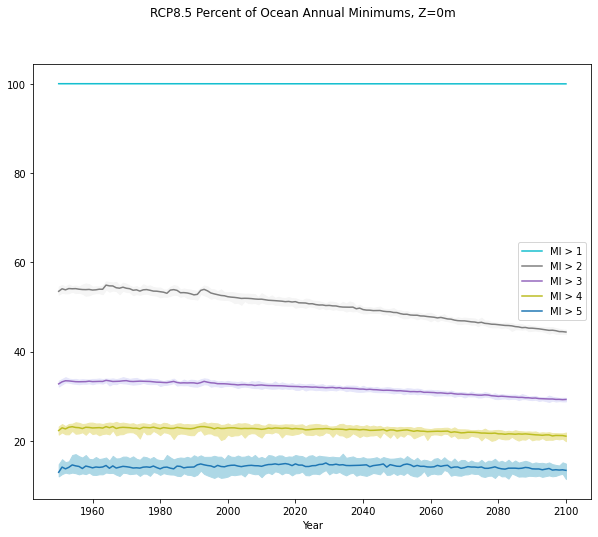

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Percent of Ocean Annual Minimums, Z=0m')
wn.filterwarnings('ignore')
years = np.arange(1950, 2101)
# func.plot_allEns(red, ax, 'lightcyan')
# func.plot_allEns(ora, ax, 'whitesmoke')
# func.plot_allEns(yel, ax, 'lavender')
# func.plot_allEns(gr, ax, 'palegoldenrod')
# func.plot_allEns(pur, ax, 'lightblue')
ax.fill_between(years, redMax, redMin, color='lightcyan')
ax.fill_between(years, orMax, orMin, color='whitesmoke')
ax.fill_between(years, yelMax, yelMin, color='lavender')
ax.fill_between(years, grMax, grMin, color='palegoldenrod')
ax.fill_between(years, purMax, purMin, color='lightblue')
ax.plot(years, rMin, color='tab:cyan', label='MI > 1')
ax.plot(years, oMin, color='tab:gray', label='MI > 2')
ax.plot(years, yMin, color='tab:purple', label='MI > 3')
ax.plot(years, gMin, color='tab:olive', label='MI > 4')
ax.plot(years, pMin, color='tab:blue', label='MI > 5')
ax.legend()
# ax.set_ylim(0,50)
ax.set_xlabel('Year')

# Blue Lampfish Annual Mean

In [21]:
r = func.find_p(trop_all, 1.0, total).groupby('time.year').mean()
o = func.find_p(trop_all, 2.0, total).groupby('time.year').mean()
y = func.find_p(trop_all, 3.0, total).groupby('time.year').mean()
g = func.find_p(trop_all, 4.0, total).groupby('time.year').mean()
p = func.find_p(trop_all, 5.0, total).groupby('time.year').mean()

In [2]:
r = [100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     ,  99.99942,  99.99918,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     ]
o = [100.      ,  99.99982 ,  99.999794,  99.9999  ,  99.99994 ,
        99.99981 ,  99.99976 ,  99.99976 ,  99.99981 ,  99.99988 ,
        99.9999  ,  99.999794,  99.999756,  99.999916,  99.99981 ,
        99.9999  ,  99.999825,  99.999756,  99.999916,  99.999756,
        99.999794,  99.99991 ,  99.99987 ,  99.99981 ,  99.99979 ,
        99.999825,  99.99985 ,  99.99982 ,  99.999886,  99.99982 ,
        99.99978 ,  99.99994 ,  99.999916,  99.9999  ,  99.99908 ,
        99.99883 ,  99.99994 ,  99.99988 ,  99.99982 ,  99.99994 ,
        99.99982 ,  99.99985 ,  99.99995 ,  99.99988 ,  99.99987 ,
        99.999886,  99.99978 ,  99.999825,  99.99978 ,  99.9999  ,
        99.99988 ,  99.99982 ,  99.99984 ,  99.99987 ,  99.999794,
        99.99984 ,  99.999886,  99.99994 ,  99.999916,  99.99991 ,
        99.999886,  99.999916,  99.99994 ,  99.999886,  99.9999  ,
        99.99985 ,  99.99981 ,  99.999855,  99.99991 ,  99.9999  ,
        99.99985 ,  99.99982 ,  99.999794,  99.999916,  99.99985 ,
        99.999886,  99.999916,  99.999916,  99.99988 ,  99.999855,
        99.99984 ,  99.99996 ,  99.999886,  99.99985 ,  99.99994 ,
        99.9999  ,  99.99987 ,  99.999825,  99.999794,  99.999855,
        99.999916,  99.99995 ,  99.9999  ,  99.99996 ,  99.99996 ,
        99.99987 ,  99.99987 ,  99.999916,  99.99984 ,  99.99991 ,
        99.99988 ,  99.99995 ,  99.99981 ,  99.99995 ,  99.99994 ,
        99.999916,  99.999886,  99.99996 ,  99.999916,  99.999916,
        99.99994 ,  99.999916,  99.999825,  99.99996 ,  99.99996 ,
        99.99991 ,  99.99982 ,  99.9999  ,  99.99996 ,  99.99991 ,
        99.99995 ,  99.99982 ,  99.999886,  99.99984 ,  99.999916,
        99.9999  ,  99.99994 ,  99.999886,  99.99982 ,  99.999886,
        99.9999  ,  99.9999  ,  99.99987 ,  99.999916,  99.9999  ,
        99.99995 ,  99.999886,  99.99994 ,  99.99995 ,  99.99988 ,
        99.99978 ,  99.99988 ,  99.99991 ,  99.9999  ,  99.999886,
        99.99981 ,  99.99988 ,  99.99982 ,  99.99988 ,  99.999886,
        99.99985 ]
y = [99.98014 , 99.97507 , 99.97233 , 99.97486 , 99.974815, 99.97442 ,
       99.973785, 99.97282 , 99.97213 , 99.97297 , 99.97378 , 99.97248 ,
       99.97388 , 99.9754  , 99.97815 , 99.97732 , 99.97674 , 99.97599 ,
       99.97668 , 99.9758  , 99.976036, 99.97523 , 99.97348 , 99.973206,
       99.97393 , 99.974945, 99.973724, 99.97262 , 99.97138 , 99.97324 ,
       99.97354 , 99.972626, 99.97523 , 99.97701 , 99.97231 , 99.97095 ,
       99.97167 , 99.96979 , 99.96934 , 99.96719 , 99.96591 , 99.96964 ,
       99.9772  , 99.971466, 99.971985, 99.96917 , 99.96655 , 99.96728 ,
       99.96561 , 99.96207 , 99.95987 , 99.95809 , 99.95917 , 99.95829 ,
       99.956116, 99.95349 , 99.952995, 99.95474 , 99.955666, 99.95345 ,
       99.95319 , 99.95493 , 99.95242 , 99.95023 , 99.946686, 99.9451  ,
       99.9472  , 99.945496, 99.944435, 99.94501 , 99.94543 , 99.9469  ,
       99.943565, 99.94293 , 99.93756 , 99.93911 , 99.935875, 99.928276,
       99.934944, 99.9291  , 99.92974 , 99.92339 , 99.92004 , 99.91761 ,
       99.92394 , 99.91687 , 99.91    , 99.9136  , 99.90045 , 99.896034,
       99.89795 , 99.88523 , 99.886696, 99.88437 , 99.87232 , 99.87885 ,
       99.870514, 99.86106 , 99.853935, 99.8631  , 99.829315, 99.81364 ,
       99.80173 , 99.801094, 99.76368 , 99.75333 , 99.76728 , 99.72645 ,
       99.727325, 99.72033 , 99.688225, 99.67917 , 99.608345, 99.6019  ,
       99.60056 , 99.507996, 99.39849 , 99.41291 , 99.35163 , 99.264366,
       99.25903 , 99.22524 , 99.09641 , 99.10607 , 99.17206 , 98.993286,
       98.77801 , 98.75204 , 98.58849 , 98.593834, 98.34324 , 98.248665,
       98.11548 , 98.27924 , 98.08972 , 98.01125 , 97.986855, 97.70733 ,
       97.64878 , 97.50294 , 97.22463 , 97.14788 , 97.12992 , 96.94437 ,
       96.89148 , 96.73774 , 96.59711 , 96.67057 , 96.48828 , 96.215034,
       95.95498 ]
g = [48.36061 , 48.50684 , 48.53984 , 48.744843, 48.760647, 48.66506 ,
       48.581116, 48.55907 , 48.63809 , 48.61385 , 48.573364, 48.64018 ,
       48.676685, 48.841015, 49.35831 , 49.23778 , 49.08579 , 48.910526,
       48.879627, 48.99184 , 48.93434 , 48.747776, 48.55527 , 48.510483,
       48.547024, 48.670628, 48.638477, 48.459095, 48.39398 , 48.30541 ,
       48.210873, 48.124256, 48.088528, 48.53595 , 48.525345, 48.28778 ,
       48.141163, 48.073483, 48.021023, 47.886093, 47.807644, 47.855606,
       48.53398 , 48.608456, 48.33049 , 48.00874 , 47.915485, 47.755314,
       47.6581  , 47.54332 , 47.452393, 47.43394 , 47.42099 , 47.294056,
       47.24107 , 47.23885 , 47.165127, 47.193394, 47.12784 , 47.072662,
       47.067657, 47.041805, 46.98401 , 46.942764, 46.856853, 46.86095 ,
       46.75577 , 46.78744 , 46.79175 , 46.679   , 46.709457, 46.676605,
       46.590946, 46.50088 , 46.492893, 46.402798, 46.28284 , 46.270985,
       46.213825, 46.20106 , 46.159023, 46.0758  , 46.030094, 46.066406,
       45.954678, 45.885616, 45.88916 , 45.77614 , 45.65453 , 45.584717,
       45.48067 , 45.49165 , 45.4118  , 45.396557, 45.382755, 45.30688 ,
       45.229538, 45.1844  , 45.131504, 45.05399 , 45.03156 , 44.8876  ,
       44.83983 , 44.720898, 44.642498, 44.62819 , 44.551655, 44.5006  ,
       44.44962 , 44.348743, 44.308247, 44.255356, 44.19563 , 44.143112,
       44.044064, 43.997864, 43.88255 , 43.763676, 43.704777, 43.675632,
       43.594208, 43.553772, 43.499573, 43.42013 , 43.33687 , 43.34395 ,
       43.304577, 43.171722, 43.060913, 43.034214, 42.908596, 42.86144 ,
       42.811493, 42.72495 , 42.685368, 42.638584, 42.546494, 42.50767 ,
       42.483536, 42.40083 , 42.3153  , 42.258606, 42.176453, 42.10661 ,
       42.028557, 41.978287, 41.945103, 41.886765, 41.749847, 41.695683,
       41.663864]
p = [28.40296 , 28.678223, 28.867258, 28.959274, 28.985153, 28.872564,
       28.85195 , 28.83639 , 28.933113, 28.902979, 28.852453, 28.859064,
       28.879549, 28.936468, 29.107605, 29.091349, 29.077606, 28.9692  ,
       29.029585, 29.087511, 29.10772 , 29.002548, 28.944757, 28.92671 ,
       28.922964, 28.941488, 28.912315, 28.879465, 28.848564, 28.800835,
       28.74025 , 28.727661, 28.679758, 28.839685, 28.875898, 28.784735,
       28.748957, 28.704546, 28.653463, 28.609179, 28.646736, 28.596266,
       28.829544, 28.952715, 28.826807, 28.72062 , 28.622198, 28.58344 ,
       28.524054, 28.523218, 28.509325, 28.48023 , 28.441528, 28.348219,
       28.330019, 28.361422, 28.344994, 28.335732, 28.288078, 28.25862 ,
       28.288874, 28.293768, 28.279633, 28.244682, 28.255486, 28.251879,
       28.219116, 28.22235 , 28.134672, 28.161537, 28.168869, 28.133804,
       28.13814 , 28.074966, 28.051744, 28.023603, 28.00397 , 28.03169 ,
       27.97132 , 27.953354, 27.909266, 27.924223, 27.937475, 27.924643,
       27.836714, 27.834404, 27.834236, 27.773928, 27.75225 , 27.694769,
       27.701782, 27.661255, 27.62165 , 27.581932, 27.576538, 27.57274 ,
       27.554201, 27.488281, 27.48923 , 27.44027 , 27.376701, 27.426468,
       27.397898, 27.37026 , 27.292582, 27.287271, 27.250696, 27.197084,
       27.101187, 27.09076 , 27.09107 , 27.035194, 27.02297 , 27.004889,
       26.96506 , 26.936026, 26.868204, 26.86379 , 26.778074, 26.740026,
       26.724882, 26.672453, 26.64757 , 26.649298, 26.592672, 26.53357 ,
       26.55568 , 26.488733, 26.425987, 26.390387, 26.310228, 26.281776,
       26.242064, 26.222109, 26.197382, 26.148071, 26.143335, 26.078264,
       26.097229, 26.056154, 25.971344, 25.913322, 25.889076, 25.817665,
       25.810114, 25.759132, 25.691246, 25.684175, 25.649397, 25.599472,
       25.561966]

In [29]:
red = func.find_p(trop_all, 1.0, total).groupby('time.year').mean()
ora = func.find_p(trop_all, 2.0, total).groupby('time.year').mean()
yel = func.find_p(trop_all, 3.0, total).groupby('time.year').mean()
gr = func.find_p(trop_all, 4.0, total).groupby('time.year').mean()
pur = func.find_p(trop_all, 5.0, total).groupby('time.year').mean()

In [30]:
redMin = red.min(dim='ensemble')
redMax = red.max(dim='ensemble')
orMin = ora.min(dim='ensemble')
orMax = ora.max(dim='ensemble')
yelMin = yel.min(dim='ensemble')
yelMax = yel.max(dim='ensemble')
grMin = gr.min(dim='ensemble')
grMax = gr.max(dim='ensemble')
purMin = pur.min(dim='ensemble')
purMax = pur.max(dim='ensemble')

In [20]:
redYear = red.groupby('time.year').mean()
orYear = ora.groupby('time.year').mean()
yelYear = yel.groupby('time.year').mean()
grYear = gr.groupby('time.year').mean()
purYear = pur.groupby('time.year').mean()

In [21]:
redMin = redYear.min(dim='ensemble')
redMax = redYear.max(dim='ensemble')
orMin = orYear.min(dim='ensemble')
orMax = orYear.max(dim='ensemble')
yelMin = yelYear.min(dim='ensemble')
yelMax = yelYear.max(dim='ensemble')
grMin = grYear.min(dim='ensemble')
grMax = grYear.max(dim='ensemble')
purMin = purYear.min(dim='ensemble')
purMax = purYear.max(dim='ensemble')

In [3]:
red_min = [100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     ,  99.98266,  99.97573,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     ]
red_max = [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100.]

In [4]:
or_min = [100.     ,  99.99887,  99.99859,  99.99915,  99.99887,  99.99887,
        99.99859,  99.99887,  99.99915,  99.99887,  99.99887,  99.99887,
        99.99887,  99.99887,  99.99887,  99.99915,  99.99859,  99.99859,
        99.99915,  99.99859,  99.99887,  99.99915,  99.99915,  99.99887,
        99.99859,  99.99887,  99.99887,  99.99887,  99.99887,  99.99887,
        99.99859,  99.99943,  99.99915,  99.99887,  99.97939,  99.96845,
        99.99972,  99.99887,  99.99887,  99.99972,  99.99887,  99.99887,
        99.99915,  99.99887,  99.99859,  99.99887,  99.99859,  99.99887,
        99.99859,  99.99887,  99.99915,  99.99887,  99.99887,  99.99887,
        99.99859,  99.99887,  99.99915,  99.99915,  99.99915,  99.99887,
        99.99887,  99.99887,  99.99887,  99.99887,  99.99915,  99.99915,
        99.99887,  99.99887,  99.99887,  99.99887,  99.99887,  99.99887,
        99.99859,  99.99915,  99.99887,  99.99859,  99.99859,  99.99943,
        99.99887,  99.99859,  99.99887,  99.99943,  99.99887,  99.99887,
        99.99943,  99.99887,  99.99887,  99.99859,  99.99887,  99.99887,
        99.99915,  99.99943,  99.99859,  99.99943,  99.99943,  99.99887,
        99.99859,  99.99915,  99.99887,  99.99887,  99.99887,  99.99943,
        99.99859,  99.99943,  99.99972,  99.99887,  99.99915,  99.99972,
        99.99887,  99.99943,  99.99915,  99.99943,  99.99859,  99.99887,
        99.99943,  99.99887,  99.99887,  99.99859,  99.99915,  99.99915,
        99.99915,  99.99887,  99.99915,  99.99859,  99.99915,  99.99915,
        99.99943,  99.99915,  99.99915,  99.99915,  99.99943,  99.99887,
        99.99915,  99.99887,  99.99943,  99.99972,  99.99887,  99.99887,
        99.99943,  99.99915,  99.99859,  99.99943,  99.99887,  99.99915,
        99.99943,  99.99887,  99.99943,  99.99887,  99.99887,  99.99915,
        99.99915]
or_max = [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100.]

In [5]:
yel_min = [99.973625, 99.96688 , 99.95518 , 99.961426, 99.96223 , 99.963066,
       99.96403 , 99.95086 , 99.95365 , 99.9519  , 99.959984, 99.96099 ,
       99.956726, 99.96177 , 99.96729 , 99.96851 , 99.96168 , 99.970406,
       99.968956, 99.965416, 99.96493 , 99.96734 , 99.96341 , 99.9623  ,
       99.96069 , 99.95626 , 99.95742 , 99.958466, 99.959755, 99.96015 ,
       99.959435, 99.96401 , 99.96879 , 99.962   , 99.94757 , 99.93563 ,
       99.963135, 99.94561 , 99.947205, 99.93582 , 99.94677 , 99.95913 ,
       99.96897 , 99.94537 , 99.95609 , 99.94427 , 99.9501  , 99.95382 ,
       99.954285, 99.94457 , 99.931   , 99.921326, 99.94852 , 99.94751 ,
       99.94037 , 99.92178 , 99.92133 , 99.9311  , 99.93798 , 99.93582 ,
       99.9177  , 99.93405 , 99.935265, 99.92835 , 99.9244  , 99.9078  ,
       99.916016, 99.91611 , 99.905304, 99.914635, 99.91526 , 99.92837 ,
       99.91624 , 99.91287 , 99.86285 , 99.91037 , 99.91043 , 99.86935 ,
       99.88845 , 99.893074, 99.87219 , 99.882286, 99.88145 , 99.856575,
       99.896935, 99.88318 , 99.86269 , 99.86292 , 99.781525, 99.757935,
       99.83047 , 99.772285, 99.79599 , 99.82784 , 99.73563 , 99.79596 ,
       99.76833 , 99.77888 , 99.73935 , 99.73975 , 99.536194, 99.62591 ,
       99.52323 , 99.516914, 99.549774, 99.45399 , 99.5478  , 99.346275,
       99.53968 , 99.390015, 99.415886, 99.32275 , 99.079475, 99.16404 ,
       99.196014, 99.01382 , 98.77711 , 98.98489 , 98.573814, 98.57276 ,
       98.5767  , 98.548485, 98.13498 , 98.64657 , 98.44431 , 98.42783 ,
       97.8467  , 97.87094 , 97.00199 , 97.95512 , 97.436646, 96.97715 ,
       97.27882 , 97.56329 , 96.90777 , 97.05163 , 96.74093 , 96.354866,
       96.40554 , 96.34235 , 95.255226, 95.11051 , 95.98885 , 95.61411 ,
       94.6152  , 94.97418 , 95.401306, 95.13742 , 95.49827 , 94.8627  ,
       94.664   ]
yel_max = [99.98551 , 99.98176 , 99.98083 , 99.9812  , 99.9829  , 99.98068 ,
       99.983765, 99.98237 , 99.980995, 99.98202 , 99.97931 , 99.9811  ,
       99.982475, 99.98055 , 99.98309 , 99.98527 , 99.98293 , 99.98486 ,
       99.98325 , 99.98348 , 99.98487 , 99.98205 , 99.98174 , 99.9795  ,
       99.9835  , 99.98179 , 99.981865, 99.9798  , 99.97883 , 99.97921 ,
       99.979675, 99.98229 , 99.98229 , 99.98513 , 99.982994, 99.979256,
       99.978966, 99.978905, 99.98172 , 99.976845, 99.97585 , 99.981255,
       99.98287 , 99.98171 , 99.97855 , 99.977425, 99.97708 , 99.9788  ,
       99.97553 , 99.97381 , 99.97311 , 99.96851 , 99.97106 , 99.97146 ,
       99.967865, 99.97363 , 99.96625 , 99.96572 , 99.97245 , 99.97091 ,
       99.968445, 99.9668  , 99.96816 , 99.97056 , 99.96792 , 99.96268 ,
       99.97042 , 99.96209 , 99.96838 , 99.96499 , 99.958984, 99.9616  ,
       99.96166 , 99.96191 , 99.96191 , 99.954254, 99.9598  , 99.96047 ,
       99.955284, 99.95339 , 99.950264, 99.94065 , 99.93618 , 99.943245,
       99.943756, 99.94245 , 99.94666 , 99.9354  , 99.93631 , 99.933716,
       99.924675, 99.92043 , 99.92172 , 99.91904 , 99.914185, 99.91174 ,
       99.91568 , 99.902985, 99.90748 , 99.89523 , 99.89439 , 99.909706,
       99.87679 , 99.870094, 99.88955 , 99.875275, 99.862724, 99.85169 ,
       99.85993 , 99.84861 , 99.86721 , 99.83124 , 99.83015 , 99.78484 ,
       99.81019 , 99.78532 , 99.73542 , 99.73731 , 99.65696 , 99.697395,
       99.640625, 99.69279 , 99.59884 , 99.47042 , 99.52058 , 99.471306,
       99.23356 , 99.474976, 99.38969 , 99.26974 , 99.06302 , 98.97881 ,
       98.86445 , 98.938286, 99.06757 , 98.84571 , 98.81594 , 98.49549 ,
       98.40003 , 98.581   , 98.15936 , 98.01063 , 98.082664, 97.70017 ,
       97.656944, 97.57849 , 97.252525, 97.4101  , 97.11936 , 96.92767 ,
       96.78268 ]

In [6]:
gr_min = [47.8261  , 48.223347, 48.106174, 48.32022 , 48.35187 , 48.272823,
       48.220013, 48.32806 , 48.06394 , 48.180164, 48.210815, 48.091763,
       48.221436, 48.290028, 48.630894, 48.784878, 48.62981 , 48.384277,
       48.54482 , 48.54717 , 48.555706, 48.389206, 48.157867, 47.909   ,
       48.15492 , 48.245953, 48.231445, 47.87866 , 47.837906, 47.831593,
       47.6775  , 47.68227 , 47.5717  , 48.100697, 48.05279 , 47.839664,
       47.637207, 47.66586 , 47.631893, 47.430206, 47.19301 , 47.273422,
       47.914196, 47.977177, 47.641895, 47.45693 , 47.40135 , 47.09618 ,
       47.025906, 47.041027, 46.874374, 46.792225, 47.03832 , 46.52347 ,
       46.37764 , 46.910603, 46.663128, 46.8053  , 46.669476, 46.534763,
       46.64415 , 46.61542 , 46.680603, 46.462757, 46.340515, 46.319256,
       46.354427, 46.37128 , 46.252   , 46.25221 , 46.17674 , 46.280685,
       45.99515 , 45.915955, 46.007893, 46.07481 , 45.859085, 45.92134 ,
       45.846165, 45.738735, 45.709698, 45.39237 , 45.64299 , 45.524933,
       45.354828, 45.34427 , 45.398365, 45.281067, 45.234436, 45.325428,
       45.15065 , 45.164875, 45.06486 , 45.104992, 44.871693, 44.946766,
       44.835003, 44.846394, 44.765354, 44.63443 , 44.540432, 44.578674,
       44.453396, 44.401154, 44.309128, 44.047848, 44.073887, 44.250748,
       44.010864, 43.929417, 43.718735, 43.864872, 43.831867, 43.81834 ,
       43.635254, 43.575207, 43.558666, 43.49699 , 43.348206, 43.335453,
       42.974705, 43.241276, 43.219357, 43.121304, 42.95386 , 42.964497,
       42.77563 , 42.836613, 42.70932 , 42.631786, 42.669415, 42.507984,
       42.501766, 42.441887, 42.071472, 42.213543, 41.869205, 42.2308  ,
       42.223663, 42.00362 , 41.95038 , 41.900818, 41.68833 , 41.62048 ,
       41.76197 , 41.40366 , 41.656338, 41.62125 , 41.40365 , 41.37402 ,
       41.27614 ]
gr_max = [49.11388 , 48.917126, 49.116833, 49.102406, 49.06171 , 49.178944,
       48.983215, 48.971027, 49.27873 , 49.05707 , 48.935303, 49.216263,
       49.220615, 49.167664, 49.88295 , 49.586502, 49.666107, 49.29399 ,
       49.28085 , 49.408436, 49.289932, 49.26552 , 49.118755, 48.94072 ,
       49.114258, 49.17676 , 49.27592 , 48.982372, 48.73492 , 48.741394,
       48.75411 , 48.57625 , 48.46379 , 49.097427, 49.005695, 48.690845,
       48.58923 , 48.495785, 48.416218, 48.30066 , 48.347088, 48.124866,
       49.027927, 49.13119 , 49.013752, 48.4059  , 48.30521 , 48.2361  ,
       48.113037, 47.96814 , 47.940823, 47.806824, 47.773083, 47.69501 ,
       47.73936 , 47.61464 , 47.59438 , 47.49332 , 47.574966, 47.4696  ,
       47.395878, 47.458035, 47.414764, 47.39243 , 47.341167, 47.355118,
       47.30698 , 47.283504, 47.250183, 47.19052 , 47.148052, 47.1908  ,
       47.135166, 47.204243, 46.92954 , 46.862553, 46.746887, 46.799   ,
       46.708927, 46.653767, 46.534058, 46.66002 , 46.504257, 46.48866 ,
       46.334682, 46.75371 , 46.350056, 46.233562, 46.067806, 45.840145,
       45.83565 , 45.813812, 45.793285, 45.83746 , 45.90591 , 45.85031 ,
       45.55667 , 45.558975, 45.44093 , 45.456776, 45.776485, 45.148655,
       45.16084 , 44.95836 , 44.94134 , 45.04001 , 44.930386, 44.750057,
       44.75559 , 44.78996 , 44.683926, 44.597473, 44.56023 , 44.520824,
       44.488293, 44.270786, 44.27412 , 44.12265 , 44.10222 , 44.178467,
       44.127563, 43.92853 , 44.057648, 43.75574 , 43.759747, 43.70967 ,
       43.581623, 43.55457 , 43.30245 , 43.46233 , 43.18365 , 43.09804 ,
       43.18721 , 42.985153, 43.170795, 42.940166, 43.011326, 42.879578,
       42.811428, 42.80351 , 42.579643, 42.47114 , 42.54992 , 42.39019 ,
       42.34242 , 42.318806, 42.291573, 42.159782, 42.03413 , 42.003124,
       41.99227 ]

In [7]:
pur_min = [27.905838, 28.350899, 28.548492, 28.503242, 28.75226 , 28.434067,
       28.590105, 28.583725, 28.602287, 28.521696, 28.446707, 28.508993,
       28.373215, 28.550116, 28.568176, 28.701235, 28.686811, 28.53135 ,
       28.650461, 28.68422 , 28.770681, 28.620115, 28.491186, 28.431564,
       28.198835, 28.429405, 28.492989, 28.483915, 28.57711 , 28.435122,
       28.171968, 28.290567, 28.38968 , 28.47177 , 28.5217  , 28.441628,
       28.452904, 28.44132 , 28.395615, 28.135595, 28.118227, 28.11306 ,
       28.34649 , 28.428934, 28.339518, 27.981855, 27.82582 , 27.960443,
       27.789312, 27.85121 , 28.068846, 27.811213, 28.031908, 27.813578,
       27.823387, 27.840368, 28.049042, 27.810202, 27.600473, 27.75202 ,
       27.79576 , 28.033659, 27.85283 , 27.679205, 27.979177, 27.954521,
       27.834177, 27.694206, 27.750391, 27.629105, 27.776598, 27.688604,
       27.645393, 27.49072 , 27.520937, 27.5483  , 27.544771, 27.618202,
       27.688309, 27.592428, 27.628885, 27.586397, 27.57251 , 27.580042,
       27.434126, 27.451021, 27.454409, 27.408457, 27.211569, 27.264406,
       27.322424, 27.288483, 27.248285, 27.213156, 27.277435, 27.294052,
       27.327559, 27.27945 , 27.265715, 27.234373, 27.077744, 27.00891 ,
       27.066526, 27.088171, 26.861578, 26.82988 , 26.873156, 26.823359,
       26.814072, 26.6967  , 26.864922, 26.782747, 26.731506, 26.715761,
       26.73983 , 26.642237, 26.60404 , 26.644323, 26.49465 , 26.499245,
       26.427414, 26.319809, 26.39617 , 26.36675 , 26.248545, 26.304764,
       26.181086, 26.273369, 26.091787, 26.028013, 25.989237, 26.009893,
       25.722998, 25.771738, 25.88363 , 25.86751 , 25.782942, 25.779037,
       25.75387 , 25.816116, 25.54679 , 25.618952, 25.58841 , 25.548645,
       25.357656, 25.488306, 25.330355, 25.377039, 25.421541, 25.317644,
       25.186083]
pur_max = [28.878357, 28.984291, 29.196045, 29.1971  , 29.336668, 29.251434,
       29.157776, 29.167486, 29.267633, 29.219553, 29.211912, 29.328192,
       29.121748, 29.367905, 29.391657, 29.370802, 29.306128, 29.32207 ,
       29.316519, 29.472006, 29.495481, 29.481169, 29.368208, 29.268814,
       29.466011, 29.438194, 29.217115, 29.209581, 29.15242 , 29.285378,
       29.238886, 28.992668, 29.10459 , 29.29277 , 29.271132, 29.212183,
       29.060234, 29.117857, 29.09667 , 29.151573, 29.034292, 28.939941,
       29.102617, 29.45761 , 29.345476, 29.019323, 28.9478  , 29.016134,
       28.907373, 28.99623 , 29.022429, 28.809183, 28.802954, 28.818426,
       28.712433, 28.717367, 28.607203, 28.618483, 28.710573, 28.660616,
       28.588785, 28.640177, 28.653845, 28.58845 , 28.61846 , 28.699877,
       28.656061, 28.719355, 28.635735, 28.68019 , 28.44519 , 28.517555,
       28.786896, 28.577509, 28.44876 , 28.321653, 28.372284, 28.364853,
       28.387362, 28.582642, 28.447762, 28.322298, 28.228918, 28.325722,
       28.160913, 28.22164 , 28.169313, 28.14077 , 28.270761, 28.054796,
       27.96058 , 27.96536 , 27.928207, 27.875841, 27.85996 , 27.917078,
       27.867693, 27.838793, 27.746307, 27.722712, 27.670214, 27.75409 ,
       27.7312  , 27.658165, 27.598557, 27.624254, 27.522295, 27.528503,
       27.415718, 27.534706, 27.433363, 27.334686, 27.20595 , 27.21961 ,
       27.268736, 27.217194, 27.219465, 27.07302 , 27.160925, 27.128616,
       27.158165, 26.96562 , 27.0305  , 27.061869, 26.89401 , 26.996607,
       26.90986 , 26.861755, 26.780775, 26.611578, 26.617727, 26.514381,
       26.534721, 26.459923, 26.368834, 26.527643, 26.39544 , 26.37533 ,
       26.377905, 26.296202, 26.25471 , 26.312876, 26.094404, 26.174631,
       26.073708, 25.998169, 26.074362, 25.87639 , 26.041864, 25.871048,
       25.878942]

Text(0, 0.5, 'Percent of Ocean')

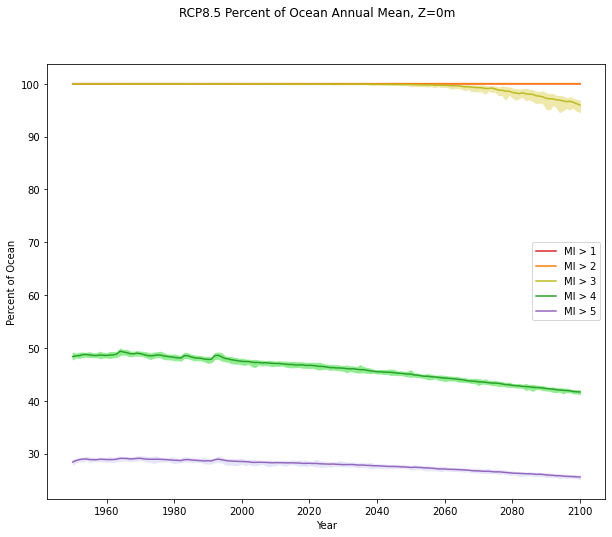

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Percent of Ocean Annual Mean, Z=0m')
wn.filterwarnings('ignore')
years = np.arange(1950, 2101)
ax.fill_between(years, red_max, red_min, color='mistyrose')
ax.fill_between(years, or_max, or_min, color='bisque')
ax.fill_between(years, yel_max, yel_min, color='palegoldenrod')
ax.fill_between(years, gr_max, gr_min, color='lightgreen')
ax.fill_between(years, pur_max, pur_min, color='lavender')
ax.plot(years, r, color='tab:red', label='MI > 1')
ax.plot(years, o, color='tab:orange', label='MI > 2')
ax.plot(years, y, color='tab:olive', label='MI > 3')
ax.plot(years, g, color='tab:green', label='MI > 4')
ax.plot(years, p, color='tab:purple', label='MI > 5')
ax.legend()
# ax.set_ylim(0,50)
ax.set_xlabel('Year')
ax.set_ylabel('Percent of Ocean')

Text(0.5, 0, 'Year')

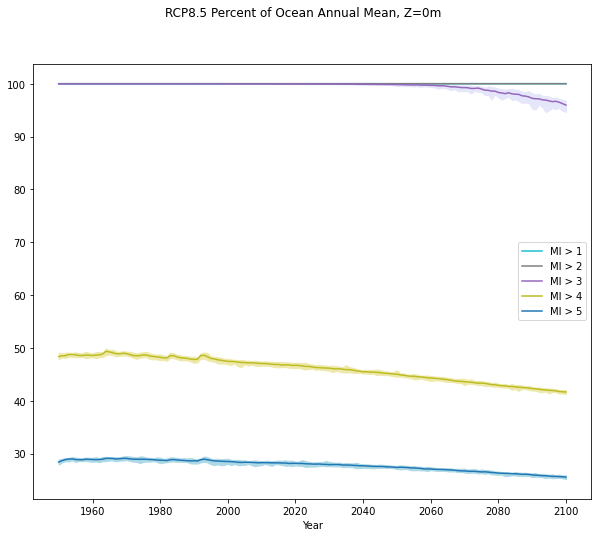

In [47]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Percent of Ocean Annual Mean, Z=0m')
wn.filterwarnings('ignore')
years = np.arange(1950, 2101)
ax.fill_between(years, redMax, redMin, color='lightcyan')
ax.fill_between(years, orMax, orMin, color='whitesmoke')
ax.fill_between(years, yelMax, yelMin, color='lavender')
ax.fill_between(years, grMax, grMin, color='palegoldenrod')
ax.fill_between(years, purMax, purMin, color='lightblue')
ax.plot(years, r, color='tab:cyan', label='MI > 1')
ax.plot(years, o, color='tab:gray', label='MI > 2')
ax.plot(years, y, color='tab:purple', label='MI > 3')
ax.plot(years, g, color='tab:olive', label='MI > 4')
ax.plot(years, p, color='tab:blue', label='MI > 5')
ax.legend()
# ax.set_ylim(0,50)
ax.set_xlabel('Year')

# Minimum

In [50]:
r = func.find_p(trop_all, 1.0, total).groupby('time.year').min()
o = func.find_p(trop_all, 2.0, total).groupby('time.year').min()
y = func.find_p(trop_all, 3.0, total).groupby('time.year').min()
g = func.find_p(trop_all, 4.0, total).groupby('time.year').min()
p = func.find_p(trop_all, 5.0, total).groupby('time.year').min()

In [49]:
red = func.find_p(trop_all, 1.0, total).groupby('time.year').min()
ora = func.find_p(trop_all, 2.0, total).groupby('time.year').min()
yel = func.find_p(trop_all, 3.0, total).groupby('time.year').min()
gr = func.find_p(trop_all, 4.0, total).groupby('time.year').min()
pur = func.find_p(trop_all, 5.0, total).groupby('time.year').min()

In [9]:
r = [100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     ,  99.99783,  99.99841,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     ]
o = [100.      ,  99.99931 ,  99.9991  ,  99.99954 ,  99.99977 ,
        99.9992  ,  99.999214,  99.9991  ,  99.99909 ,  99.99954 ,
        99.99954 ,  99.998985,  99.99909 ,  99.99966 ,  99.99931 ,
        99.99966 ,  99.99931 ,  99.999214,  99.99954 ,  99.9991  ,
        99.9992  ,  99.99954 ,  99.99943 ,  99.99931 ,  99.99909 ,
        99.9992  ,  99.99931 ,  99.999214,  99.99943 ,  99.99943 ,
        99.9992  ,  99.99966 ,  99.99966 ,  99.99966 ,  99.99766 ,
        99.9979  ,  99.99977 ,  99.999214,  99.99943 ,  99.99966 ,
        99.99909 ,  99.99943 ,  99.99977 ,  99.99943 ,  99.99954 ,
        99.99954 ,  99.99931 ,  99.99931 ,  99.9992  ,  99.99966 ,
        99.99943 ,  99.999214,  99.99943 ,  99.99943 ,  99.9992  ,
        99.9992  ,  99.99954 ,  99.99966 ,  99.99954 ,  99.99966 ,
        99.99943 ,  99.99966 ,  99.99966 ,  99.99954 ,  99.99954 ,
        99.99911 ,  99.999214,  99.99943 ,  99.99966 ,  99.99966 ,
        99.99943 ,  99.99931 ,  99.99932 ,  99.99966 ,  99.99931 ,
        99.99966 ,  99.99977 ,  99.99954 ,  99.99954 ,  99.99943 ,
        99.99943 ,  99.99966 ,  99.99954 ,  99.99943 ,  99.99977 ,
        99.99943 ,  99.99943 ,  99.9992  ,  99.99931 ,  99.99931 ,
        99.99966 ,  99.99966 ,  99.99966 ,  99.99977 ,  99.99977 ,
        99.99954 ,  99.99943 ,  99.99966 ,  99.99932 ,  99.99966 ,
        99.99943 ,  99.99966 ,  99.9992  ,  99.999886,  99.99966 ,
        99.99966 ,  99.99954 ,  99.99954 ,  99.99977 ,  99.99954 ,
        99.99977 ,  99.99966 ,  99.9992  ,  99.999886,  99.99977 ,
        99.99966 ,  99.9991  ,  99.99954 ,  99.99977 ,  99.99966 ,
        99.99977 ,  99.99888 ,  99.99931 ,  99.99931 ,  99.99954 ,
        99.99931 ,  99.99977 ,  99.99943 ,  99.9992  ,  99.99954 ,
        99.99954 ,  99.99966 ,  99.9992  ,  99.99954 ,  99.9992  ,
        99.99966 ,  99.99943 ,  99.99966 ,  99.99977 ,  99.9992  ,
        99.998985,  99.9991  ,  99.99954 ,  99.99943 ,  99.99931 ,
        99.9992  ,  99.99931 ,  99.99899 ,  99.99943 ,  99.99932 ,
        99.999214]
y = [99.968834, 99.951935, 99.945915, 99.95051 , 99.95342 , 99.95433 ,
       99.95295 , 99.95155 , 99.948   , 99.94825 , 99.945786, 99.95093 ,
       99.95132 , 99.958984, 99.96465 , 99.95963 , 99.95786 , 99.957245,
       99.96266 , 99.95934 , 99.95571 , 99.95479 , 99.949615, 99.94488 ,
       99.954056, 99.9565  , 99.94811 , 99.951775, 99.94442 , 99.95218 ,
       99.951935, 99.9479  , 99.96242 , 99.96115 , 99.94572 , 99.945915,
       99.94409 , 99.93635 , 99.939644, 99.9326  , 99.93255 , 99.940414,
       99.96113 , 99.93978 , 99.94298 , 99.93441 , 99.92463 , 99.93955 ,
       99.92319 , 99.91836 , 99.90908 , 99.91059 , 99.90778 , 99.8979  ,
       99.89624 , 99.883644, 99.88937 , 99.89139 , 99.89803 , 99.89375 ,
       99.89033 , 99.90011 , 99.894646, 99.882935, 99.871315, 99.86141 ,
       99.87367 , 99.872154, 99.86751 , 99.866875, 99.86463 , 99.8759  ,
       99.86245 , 99.86248 , 99.8506  , 99.843544, 99.83729 , 99.8305  ,
       99.84168 , 99.82293 , 99.83442 , 99.79904 , 99.800095, 99.79399 ,
       99.821   , 99.77375 , 99.76416 , 99.77236 , 99.73239 , 99.73682 ,
       99.74241 , 99.7117  , 99.71522 , 99.71928 , 99.68717 , 99.70166 ,
       99.68912 , 99.66018 , 99.653534, 99.67629 , 99.61998 , 99.6085  ,
       99.57291 , 99.60108 , 99.522415, 99.52767 , 99.54373 , 99.51199 ,
       99.48991 , 99.49362 , 99.43064 , 99.39216 , 99.295265, 99.31359 ,
       99.3048  , 99.20153 , 99.01676 , 98.94396 , 98.87666 , 98.68017 ,
       98.78636 , 98.69728 , 98.61164 , 98.587105, 98.60511 , 98.36007 ,
       97.9984  , 97.877716, 97.71866 , 97.79683 , 97.41915 , 97.47621 ,
       97.06678 , 97.16594 , 96.97346 , 96.73489 , 96.89312 , 96.4919  ,
       96.39418 , 96.04631 , 95.76447 , 95.64596 , 95.640335, 95.64433 ,
       95.32879 , 95.3365  , 95.177345, 95.11485 , 94.76903 , 94.382065,
       94.29479 ]
g = [45.178066, 45.68607 , 45.739567, 45.90311 , 45.87578 , 45.846905,
       45.780136, 45.887585, 45.773186, 45.768326, 45.54358 , 45.768288,
       45.696526, 45.722843, 46.394264, 46.267048, 46.072166, 46.026287,
       46.01613 , 46.147503, 46.018387, 45.89709 , 45.74803 , 45.72516 ,
       45.63903 , 45.680973, 45.720093, 45.57554 , 45.504738, 45.46409 ,
       45.365383, 45.356186, 45.167034, 45.611946, 45.705437, 45.451588,
       45.316055, 45.29417 , 45.186718, 45.12189 , 44.92764 , 44.927345,
       45.44617 , 45.767586, 45.51288 , 45.2092  , 45.148537, 44.932922,
       44.900627, 44.790928, 44.621044, 44.549427, 44.42724 , 44.387962,
       44.36321 , 44.43211 , 44.262947, 44.343716, 44.31815 , 44.22601 ,
       44.170815, 44.16351 , 44.087368, 44.071415, 43.976772, 43.995342,
       43.883366, 43.88278 , 43.917248, 43.79027 , 43.774715, 43.729843,
       43.654583, 43.733498, 43.616043, 43.545776, 43.44878 , 43.255753,
       43.336857, 43.193718, 43.248787, 43.24653 , 43.21719 , 43.137638,
       43.115597, 43.09383 , 42.97733 , 42.944653, 42.778442, 42.783978,
       42.63781 , 42.543343, 42.61811 , 42.52849 , 42.484097, 42.46447 ,
       42.382824, 42.3229  , 42.292934, 42.217934, 42.162266, 42.047974,
       41.944767, 41.88593 , 41.83182 , 41.8231  , 41.790665, 41.692974,
       41.61626 , 41.56326 , 41.50756 , 41.420067, 41.29397 , 41.288906,
       41.213657, 41.121174, 41.10857 , 40.8559  , 40.89018 , 40.80117 ,
       40.79387 , 40.618935, 40.63815 , 40.515625, 40.446518, 40.513443,
       40.394253, 40.348274, 40.119873, 40.19523 , 40.105984, 40.030624,
       39.951744, 39.915928, 39.829464, 39.684277, 39.643314, 39.580112,
       39.555984, 39.503162, 39.36415 , 39.381374, 39.308895, 39.20152 ,
       39.087353, 39.04671 , 39.04161 , 38.86107 , 38.818027, 38.749153,
       38.745384]
p = [25.443428, 26.04784 , 25.8549  , 26.216944, 26.429945, 26.26971 ,
       26.150196, 26.031704, 26.281713, 26.329845, 26.189526, 26.163696,
       26.177885, 26.160412, 26.471579, 26.21383 , 26.439966, 26.077028,
       26.274818, 26.253124, 26.310974, 26.268482, 26.15843 , 26.198526,
       26.069021, 26.288942, 26.258635, 26.177666, 26.230925, 26.116774,
       26.009655, 26.165136, 26.017622, 26.001562, 26.124796, 26.241814,
       26.157572, 26.024065, 26.008162, 25.983007, 26.086271, 26.210026,
       26.290321, 26.372587, 26.348536, 26.196663, 25.986555, 26.113375,
       26.00421 , 26.000933, 26.034313, 26.103786, 26.071907, 25.95116 ,
       25.857817, 25.96844 , 25.912777, 25.99535 , 25.882704, 25.790407,
       25.711668, 25.873217, 25.96259 , 25.916052, 25.993816, 26.006672,
       25.886324, 25.883322, 25.873222, 25.74305 , 25.86572 , 25.737345,
       25.734062, 25.656466, 25.62954 , 25.664074, 25.786335, 25.78213 ,
       25.735239, 25.74487 , 25.727947, 25.616354, 25.734156, 25.739096,
       25.612785, 25.54025 , 25.63645 , 25.70128 , 25.649586, 25.494946,
       25.591032, 25.562126, 25.393354, 25.412632, 25.439913, 25.500431,
       25.543383, 25.328   , 25.457767, 25.460945, 25.262575, 25.364595,
       25.40476 , 25.455444, 25.31711 , 25.219845, 25.307281, 25.281866,
       25.16338 , 25.10757 , 25.092733, 25.114613, 25.093596, 25.133661,
       25.147375, 25.101006, 24.964521, 25.022427, 24.911776, 24.76134 ,
       24.84449 , 24.91686 , 24.85306 , 24.879772, 24.814617, 24.653135,
       24.738544, 24.710602, 24.640003, 24.634295, 24.532154, 24.51604 ,
       24.433222, 24.50536 , 24.476265, 24.40868 , 24.464108, 24.376278,
       24.401667, 24.38608 , 24.30413 , 24.239107, 24.203789, 24.12235 ,
       24.212702, 24.152348, 24.00714 , 24.069078, 24.079756, 24.015778,
       23.918022]

In [57]:
redMin = red.min(dim='ensemble')
redMax = red.max(dim='ensemble')
orMin = ora.min(dim='ensemble')
orMax = ora.max(dim='ensemble')
yelMin = yel.min(dim='ensemble')
yelMax = yel.max(dim='ensemble')
grMin = gr.min(dim='ensemble')
grMax = gr.max(dim='ensemble')
purMin = pur.min(dim='ensemble')
purMax = pur.max(dim='ensemble')

In [10]:
red_min = [100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     ,  99.93511,  99.95243,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     , 100.     , 100.     , 100.     , 100.     , 100.     ,
       100.     ]
red_max = [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100.]

In [11]:
or_min = [100.      ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.92963 ,
        99.93711 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.996605,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.996605,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.996605,
        99.99661 ,  99.99661 ,  99.996605,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.99661 ,  99.996605,  99.996605,
        99.99661 ,  99.99661 ,  99.99661 ,  99.996605,  99.996605,
        99.996605,  99.996605,  99.996605,  99.99661 ,  99.996605,
        99.996605,  99.996605,  99.996605,  99.99661 ,  99.99661 ,
        99.99661 ,  99.99661 ,  99.996605,  99.99661 ,  99.996605,
        99.996605,  99.99661 ,  99.996605,  99.996605,  99.996605,
        99.99661 ,  99.996605,  99.996605,  99.996605,  99.996605,
        99.996605,  99.996605,  99.996605,  99.996605,  99.996605,
        99.996605,  99.996605,  99.996605,  99.99322 ,  99.996605,
        99.996605,  99.996605,  99.996605,  99.996605,  99.996605,
        99.996605,  99.996605,  99.996605,  99.996605,  99.99661 ,
        99.996605]
or_max = [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100.]

In [12]:
yel_min = [99.93168 , 99.90943 , 99.88771 , 99.904915, 99.90897 , 99.89613 ,
       99.90007 , 99.86934 , 99.852394, 99.88891 , 99.871376, 99.877846,
       99.90274 , 99.88985 , 99.92554 , 99.90222 , 99.91202 , 99.91493 ,
       99.90953 , 99.90892 , 99.91557 , 99.89974 , 99.88367 , 99.89277 ,
       99.90725 , 99.880516, 99.906006, 99.91349 , 99.8968  , 99.90323 ,
       99.91092 , 99.90052 , 99.92596 , 99.89331 , 99.88368 , 99.88731 ,
       99.881386, 99.86288 , 99.87144 , 99.823326, 99.876564, 99.874985,
       99.91907 , 99.83126 , 99.889824, 99.83899 , 99.871086, 99.893394,
       99.85541 , 99.85371 , 99.82888 , 99.78361 , 99.831924, 99.8386  ,
       99.85434 , 99.74602 , 99.82157 , 99.82891 , 99.83326 , 99.826004,
       99.83241 , 99.80544 , 99.83536 , 99.78007 , 99.79077 , 99.730125,
       99.780396, 99.7739  , 99.78526 , 99.77436 , 99.7727  , 99.82535 ,
       99.68777 , 99.71865 , 99.63887 , 99.748924, 99.73477 , 99.71305 ,
       99.6899  , 99.70187 , 99.7175  , 99.684395, 99.693214, 99.62637 ,
       99.73006 , 99.632484, 99.60179 , 99.53782 , 99.31456 , 99.38759 ,
       99.54012 , 99.4633  , 99.4929  , 99.540016, 99.39579 , 99.49181 ,
       99.460106, 99.43915 , 99.41276 , 99.455635, 98.86454 , 98.89418 ,
       99.11364 , 99.061   , 98.97858 , 99.07868 , 99.087234, 98.881546,
       99.04363 , 98.60559 , 98.88955 , 98.674545, 98.2722  , 98.31822 ,
       98.68141 , 98.37544 , 97.71656 , 98.317085, 97.62032 , 97.21313 ,
       97.58039 , 97.5723  , 96.44621 , 97.4073  , 97.485374, 97.5417  ,
       96.8078  , 96.4054  , 95.35816 , 96.13766 , 95.24378 , 95.53166 ,
       95.36967 , 95.76784 , 95.10268 , 95.19777 , 95.36251 , 94.71854 ,
       94.237595, 94.31889 , 93.419716, 93.31204 , 93.71443 , 94.05444 ,
       92.16387 , 92.58755 , 93.88102 , 93.669975, 92.57566 , 91.823105,
       92.43238 ]
yel_max = [99.97645 , 99.971466, 99.96538 , 99.96813 , 99.97148 , 99.968185,
       99.97121 , 99.974495, 99.96813 , 99.96636 , 99.96645 , 99.96955 ,
       99.96834 , 99.971054, 99.97475 , 99.97631 , 99.97632 , 99.97297 ,
       99.971054, 99.97783 , 99.971664, 99.966225, 99.96513 , 99.966324,
       99.969734, 99.97148 , 99.96854 , 99.967926, 99.96323 , 99.96958 ,
       99.966545, 99.9663  , 99.97148 , 99.97652 , 99.96828 , 99.969635,
       99.96791 , 99.96841 , 99.97469 , 99.95871 , 99.95874 , 99.962074,
       99.97475 , 99.96962 , 99.96316 , 99.9618  , 99.954796, 99.964745,
       99.95631 , 99.95168 , 99.94638 , 99.942055, 99.942055, 99.95017 ,
       99.9325  , 99.95532 , 99.93346 , 99.931   , 99.925446, 99.955376,
       99.932495, 99.945244, 99.93354 , 99.956665, 99.95311 , 99.93282 ,
       99.93982 , 99.92105 , 99.92335 , 99.93927 , 99.91983 , 99.92    ,
       99.93496 , 99.92012 , 99.94226 , 99.897064, 99.941086, 99.90815 ,
       99.90637 , 99.901924, 99.89243 , 99.86359 , 99.86902 , 99.86953 ,
       99.899826, 99.87335 , 99.85953 , 99.869514, 99.85031 , 99.856804,
       99.82527 , 99.829704, 99.795715, 99.81344 , 99.82995 , 99.80153 ,
       99.79866 , 99.75648 , 99.76841 , 99.78508 , 99.78587 , 99.74701 ,
       99.71958 , 99.69155 , 99.69726 , 99.65819 , 99.680695, 99.65612 ,
       99.706474, 99.64926 , 99.66474 , 99.61692 , 99.63485 , 99.573494,
       99.5666  , 99.485146, 99.506744, 99.43695 , 99.33206 , 99.194626,
       99.40237 , 99.24372 , 99.15253 , 98.99879 , 99.07576 , 98.97198 ,
       98.67117 , 98.87738 , 98.885414, 98.80956 , 98.229996, 98.28696 ,
       98.219986, 98.11046 , 98.6617  , 98.080765, 98.39355 , 97.808304,
       97.321396, 97.29301 , 97.410355, 96.68946 , 97.40949 , 96.81486 ,
       96.70008 , 96.25534 , 96.179756, 96.14565 , 95.8737  , 95.35877 ,
       95.45152 ]

In [13]:
gr_min = [44.31516 , 45.207443, 45.068325, 45.200657, 45.12112 , 45.248657,
       45.039   , 45.30364 , 45.26447 , 44.879517, 44.84603 , 44.767555,
       45.170918, 45.35643 , 45.707874, 45.71204 , 45.486794, 45.36131 ,
       45.228638, 45.777706, 45.461292, 45.41134 , 45.07559 , 45.22805 ,
       45.08968 , 44.822113, 45.25794 , 44.856426, 44.70344 , 44.830837,
       44.63372 , 44.584652, 44.58086 , 45.091057, 45.069416, 44.80197 ,
       44.82383 , 44.74144 , 44.64065 , 44.60314 , 44.238632, 44.33476 ,
       44.785786, 45.039154, 44.71724 , 44.61055 , 44.597023, 44.427418,
       43.82506 , 44.244965, 44.113445, 43.65247 , 43.816097, 43.46822 ,
       43.65485 , 43.69777 , 43.417664, 43.72013 , 43.883327, 43.455784,
       43.691856, 43.775085, 43.51703 , 43.224422, 43.235703, 43.34323 ,
       43.26222 , 43.185913, 43.364967, 43.18426 , 43.17861 , 43.184635,
       43.05576 , 43.020466, 43.03057 , 43.066364, 42.898846, 42.556797,
       42.63927 , 42.1417  , 42.48695 , 42.56396 , 42.528866, 42.28092 ,
       42.634537, 42.50925 , 42.51563 , 42.273624, 42.017773, 41.960167,
       42.044365, 41.956276, 41.89723 , 42.10194 , 41.716667, 41.770756,
       41.864758, 41.724163, 41.777843, 41.653545, 41.67179 , 41.439186,
       41.07797 , 41.33023 , 41.31727 , 41.252743, 41.222786, 41.02266 ,
       41.103096, 40.95678 , 40.95674 , 40.486843, 40.58994 , 40.79668 ,
       40.484737, 40.73269 , 40.60145 , 40.431126, 40.351276, 40.371426,
       40.229874, 40.18944 , 40.121075, 40.10448 , 39.990017, 39.9093  ,
       39.93879 , 39.941452, 39.491226, 39.623108, 39.462532, 39.298954,
       39.413612, 39.308514, 39.209446, 38.673325, 39.08752 , 39.12581 ,
       39.051308, 39.002983, 38.88146 , 38.832294, 38.912212, 38.777363,
       38.288296, 38.217228, 38.461433, 37.979294, 37.911087, 38.179245,
       37.97119 ]
gr_max = [46.018414, 46.29096 , 46.306183, 46.570816, 46.54013 , 46.300972,
       46.283905, 46.583263, 46.164906, 46.267216, 46.287975, 46.275173,
       46.274776, 46.192497, 47.039833, 46.840878, 46.647636, 46.568863,
       46.595657, 46.943977, 46.678337, 46.514957, 46.380444, 46.564907,
       46.38491 , 46.7227  , 46.213272, 46.320583, 46.265446, 46.24569 ,
       45.870422, 46.016182, 46.2226  , 46.00976 , 46.59861 , 45.932285,
       45.82794 , 45.8318  , 45.846603, 45.749924, 45.654755, 45.538475,
       45.97176 , 46.276073, 46.22942 , 45.71741 , 45.74664 , 45.47857 ,
       45.552082, 45.43723 , 45.11951 , 45.073204, 44.85283 , 45.136364,
       45.015774, 45.043373, 45.04443 , 44.99457 , 44.919262, 45.083183,
       44.95935 , 44.92847 , 44.678967, 44.489433, 44.54714 , 44.47041 ,
       44.45237 , 44.80165 , 44.457485, 44.378487, 44.435017, 44.232864,
       44.198914, 44.381947, 44.38182 , 44.003498, 43.94792 , 44.10173 ,
       43.836113, 43.778984, 43.930565, 44.110733, 43.71236 , 43.755096,
       43.566837, 43.68261 , 43.676495, 43.60337 , 43.40928 , 43.51899 ,
       43.07561 , 43.15087 , 43.27578 , 43.093204, 43.01138 , 42.878567,
       42.99603 , 42.763832, 42.635098, 42.967823, 43.146305, 42.76734 ,
       42.389404, 42.57712 , 42.44361 , 42.364002, 42.362175, 42.164528,
       42.047867, 41.998543, 42.00637 , 42.009567, 41.79033 , 41.67771 ,
       41.890015, 41.618393, 41.694946, 41.329895, 41.628437, 41.22228 ,
       41.28515 , 41.175556, 41.333004, 41.144524, 41.12567 , 41.11176 ,
       40.80057 , 40.783344, 40.80725 , 40.760685, 40.47193 , 40.603302,
       40.37677 , 40.614063, 40.333836, 40.214832, 40.661194, 40.06227 ,
       39.944454, 40.137436, 39.973713, 39.897842, 40.007336, 39.53372 ,
       39.82623 , 39.646713, 39.69864 , 39.431755, 39.351448, 39.182697,
       39.304646]

In [14]:
pur_min = [24.397272, 25.09939 , 24.893179, 24.884705, 25.495216, 25.122162,
       24.8177  , 25.26554 , 24.82568 , 25.543812, 25.065454, 24.997187,
       24.744545, 24.897638, 25.067007, 24.687712, 25.748709, 24.840477,
       25.031017, 25.304764, 25.377136, 25.426706, 25.271616, 25.059774,
       24.577314, 25.445753, 25.159498, 25.042519, 25.350418, 25.164457,
       24.87721 , 25.349077, 24.85095 , 25.119793, 24.157618, 24.807198,
       24.99022 , 25.10111 , 24.815474, 24.702019, 24.732847, 25.4116  ,
       25.61486 , 24.81454 , 25.084934, 25.04708 , 24.61795 , 24.532627,
       24.304916, 23.85699 , 24.995056, 24.342922, 24.844799, 24.669548,
       24.852394, 24.203768, 24.777273, 24.92754 , 24.716736, 24.519728,
       24.237976, 24.987417, 25.056362, 25.043493, 24.949858, 25.125229,
       24.234602, 24.948254, 24.358624, 24.571142, 24.989758, 24.649517,
       25.064507, 24.68916 , 24.682295, 24.574154, 24.92125 , 24.547363,
       24.438986, 25.083061, 24.776077, 23.892918, 24.984491, 24.673752,
       24.543215, 24.330944, 24.603237, 25.061916, 24.476791, 24.277328,
       24.29935 , 24.242968, 24.290205, 24.356941, 24.481138, 24.168434,
       24.989782, 24.37895 , 23.870083, 24.797424, 23.928867, 24.457438,
       23.952478, 24.714554, 24.497465, 23.883604, 24.175222, 24.342983,
       24.576574, 23.46493 , 24.579311, 24.64779 , 24.606796, 24.356958,
       24.692255, 24.55331 , 24.121847, 24.208786, 24.043556, 23.816988,
       23.73437 , 23.86756 , 24.173645, 23.711258, 24.125076, 23.379873,
       23.89212 , 23.851854, 23.180107, 23.381199, 23.934578, 23.384832,
       23.43155 , 23.42552 , 23.915615, 23.769348, 23.503101, 23.543962,
       23.268633, 23.774551, 23.164263, 23.45718 , 23.317907, 23.65012 ,
       23.247322, 23.279673, 23.19772 , 23.70335 , 23.534016, 23.477978,
       22.966307]
pur_max = [26.474867, 26.615402, 26.479012, 27.056053, 27.01141 , 26.957617,
       26.90495 , 26.772667, 27.022228, 26.996971, 27.226189, 27.07298 ,
       26.987032, 26.950268, 27.264938, 27.36404 , 27.154198, 27.179962,
       26.872746, 27.150372, 27.238468, 27.249077, 27.119   , 26.85853 ,
       26.878822, 27.4793  , 27.011686, 26.866463, 26.92397 , 26.87245 ,
       27.203297, 26.958424, 27.085009, 26.690235, 26.95631 , 26.942375,
       26.839584, 26.6955  , 26.786999, 26.716522, 26.932573, 26.739746,
       26.836105, 27.333   , 27.320019, 27.000883, 26.751509, 26.83189 ,
       26.652422, 26.846674, 26.864004, 26.835875, 26.782904, 26.811892,
       26.66847 , 26.837408, 26.85238 , 26.738718, 26.566393, 26.580704,
       26.417477, 26.584076, 26.559813, 26.637627, 26.829916, 26.858639,
       26.456192, 26.587576, 26.482111, 26.518398, 26.463303, 26.561272,
       26.746412, 26.43193 , 26.421326, 26.363388, 26.492142, 26.426792,
       26.519152, 26.508799, 26.15455 , 26.27823 , 26.287083, 26.399502,
       26.413363, 26.417627, 26.305696, 26.21912 , 26.575256, 26.080551,
       26.258364, 26.21668 , 26.111546, 26.17551 , 26.244703, 26.202435,
       26.053751, 25.890669, 25.990585, 26.097467, 26.027536, 25.927544,
       25.831764, 25.91628 , 25.787184, 25.835339, 25.85081 , 26.08079 ,
       25.769981, 25.783533, 25.62358 , 25.833834, 25.513634, 25.605133,
       25.601746, 25.528538, 25.66306 , 25.803915, 25.4687  , 25.45975 ,
       25.486248, 25.442883, 25.36166 , 25.272057, 25.356262, 25.101492,
       25.445513, 25.166756, 25.25693 , 25.14543 , 25.232243, 25.315008,
       24.912207, 25.169313, 25.060648, 25.100548, 25.01174 , 25.005224,
       24.88604 , 24.802307, 24.910666, 24.861958, 24.775597, 24.787804,
       24.670797, 24.629349, 24.467993, 24.511658, 24.545973, 24.501   ,
       24.586695]

Text(0.5, 0, 'Year')

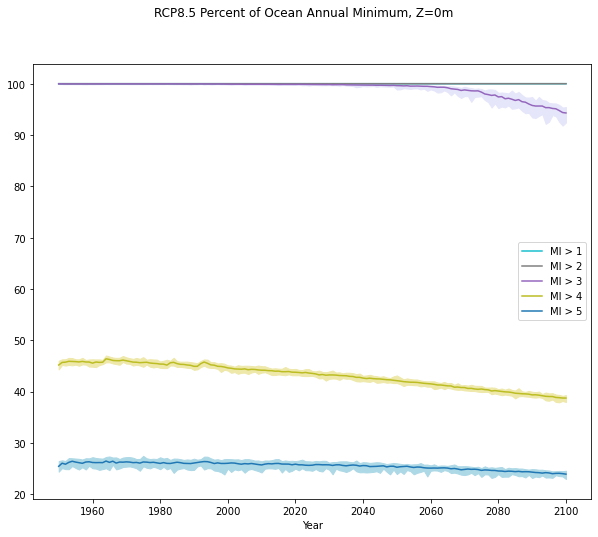

In [73]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Percent of Ocean Annual Minimum, Z=0m')
wn.filterwarnings('ignore')
years = np.arange(1950, 2101)
ax.fill_between(years, redMax, redMin, color='lightcyan')
ax.fill_between(years, orMax, orMin, color='whitesmoke')
ax.fill_between(years, yelMax, yelMin, color='lavender')
ax.fill_between(years, grMax, grMin, color='palegoldenrod')
ax.fill_between(years, purMax, purMin, color='lightblue')
ax.plot(years, r, color='tab:cyan', label='MI > 1')
ax.plot(years, o, color='tab:gray', label='MI > 2')
ax.plot(years, y, color='tab:purple', label='MI > 3')
ax.plot(years, g, color='tab:olive', label='MI > 4')
ax.plot(years, p, color='tab:blue', label='MI > 5')
ax.legend()
# ax.set_ylim(0,50)
ax.set_xlabel('Year')

Text(0, 0.5, 'Percent of Ocean')

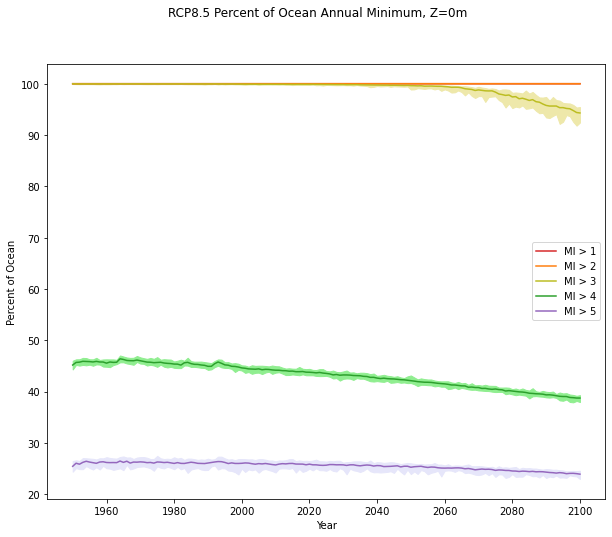

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
fig.suptitle('RCP8.5 Percent of Ocean Annual Minimum, Z=0m')
wn.filterwarnings('ignore')
years = np.arange(1950, 2101)
ax.fill_between(years, red_max, red_min, color='mistyrose')
ax.fill_between(years, or_max, or_min, color='bisque')
ax.fill_between(years, yel_max, yel_min, color='palegoldenrod')
ax.fill_between(years, gr_max, gr_min, color='lightgreen')
ax.fill_between(years, pur_max, pur_min, color='lavender')
ax.plot(years, r, color='tab:red', label='MI > 1')
ax.plot(years, o, color='tab:orange', label='MI > 2')
ax.plot(years, y, color='tab:olive', label='MI > 3')
ax.plot(years, g, color='tab:green', label='MI > 4')
ax.plot(years, p, color='tab:purple', label='MI > 5')
ax.legend()
# ax.set_ylim(0,50)
ax.set_xlabel('Year')
ax.set_ylabel('Percent of Ocean')